# Libraries

In [2]:
#### libraries ####
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd


from scipy import signal
from scipy.io import wavfile

# from pybv import write_brainvision
from pyprep.prep_pipeline import PrepPipeline
from mne_icalabel import label_components

# Trigger latency correction
Fixing trigger timing & renaming events

## parameters

In [5]:
# directory
input_dir = os.getcwd() + '/../raw data/eeg_brainvision/'
output_dir = os.getcwd() + '/../preprocessed/1_trigger_lag_corrected/'
# create a folder if the folder doesn't exist
os.makedirs(output_dir, exist_ok=True)


# create a dictionary for blocks and block markers
block_dict = {
    'dorsal_highStan_lowDevi': 1000, # standard: dorsal_high; deviant: dorsal_low
    'dorsal_lowStan_highDevi': 2000, # standard: dorsal_low; deviant: dorsal_high
    'glottal_highStan_lowDevi': 3000, # standard: glottal_high; deviant: glottal_low
    'glottal_lowStan_highDevi': 4000, # standard: glottal_low; deviant: glottal_high
}

# exclude participants with missing data
exclude_ppts = [
    '0027', # vot, incomplete eeg recording due to wrong sound library setting
    '0028', # f0, missing block 3 and 4
    '0030', # missing block 3 and 4
    '0034', # missing block 3
    '0040', # f0, missing block 3 and 4
    '0046', # f0, missing block 2,3,4
]


# trigger searching window (actual trigger time based on audio - trigger time in the data)
t_left = -0.01
t_right = 0.4 # long latency due to using pygame sound library

Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0001_F0.vhdr...
Setting channel info structure...
Reading 0 ... 1907999  =      0.000 ...  3815.998 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0001_F0_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0001_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0001_F0_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0002_F0.vhdr...
Setting channel info structure...
Reading 0 ... 1966479  =      0.000 ...  3932.958 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0002_F0_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0002_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0002_F0_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0003_VOT.vhdr...
Setting channel info structure...
Reading 0 ... 2064139  =      0.000 ...  4128.278 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0003_VOT_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0003_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0003_VOT_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0004_VOT.vhdr...
Setting channel info structure...
Reading 0 ... 1856059  =      0.000 ...  3712.118 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0004_VOT_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0004_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0004_VOT_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0005_F0.vhdr...
Setting channel info structure...
Reading 0 ... 1634399  =      0.000 ...  3268.798 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0005_F0_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0005_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0005_F0_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0006_VOT.vhdr...
Setting channel info structure...
Reading 0 ... 2086569  =      0.000 ...  4173.138 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0006_VOT_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0006_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0006_VOT_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0007_F0.vhdr...
Setting channel info structure...
Reading 0 ... 2137609  =      0.000 ...  4275.218 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0007_F0_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0007_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0007_F0_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0008_VOT.vhdr...
Setting channel info structure...
Reading 0 ... 2166069  =      0.000 ...  4332.138 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0008_VOT_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0008_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0008_VOT_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0009_F0.vhdr...
Setting channel info structure...
Reading 0 ... 2056209  =      0.000 ...  4112.418 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0009_F0_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0009_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0009_F0_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0011_VOT.vhdr...
Setting channel info structure...
Reading 0 ... 2065709  =      0.000 ...  4131.418 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0011_VOT_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0011_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0011_VOT_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0012_F0.vhdr...
Setting channel info structure...
Reading 0 ... 2050969  =      0.000 ...  4101.938 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0012_F0_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0012_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0012_F0_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0014_F0.vhdr...
Setting channel info structure...
Reading 0 ... 2080239  =      0.000 ...  4160.478 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0014_F0_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0014_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0014_F0_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0015_VOT.vhdr...
Setting channel info structure...
Reading 0 ... 2118439  =      0.000 ...  4236.878 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0015_VOT_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0015_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0015_VOT_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0016_F0.vhdr...
Setting channel info structure...
Reading 0 ... 2022339  =      0.000 ...  4044.678 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0016_F0_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0016_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0016_F0_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0017_VOT.vhdr...
Setting channel info structure...
Reading 0 ... 2068769  =      0.000 ...  4137.538 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0017_VOT_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0017_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0017_VOT_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0018_F0.vhdr...
Setting channel info structure...
Reading 0 ... 2068919  =      0.000 ...  4137.838 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0018_F0_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0018_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0018_F0_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0019_VOT.vhdr...
Setting channel info structure...
Reading 0 ... 2073289  =      0.000 ...  4146.578 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0019_VOT_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0019_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0019_VOT_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0020_F0.vhdr...
Setting channel info structure...
Reading 0 ... 2067979  =      0.000 ...  4135.958 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0020_F0_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0020_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0020_F0_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0021_VOT.vhdr...
Setting channel info structure...
Reading 0 ... 2099219  =      0.000 ...  4198.438 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0021_VOT_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0021_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0021_VOT_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0022_F0.vhdr...
Setting channel info structure...
Reading 0 ... 2041509  =      0.000 ...  4083.018 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0022_F0_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0022_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0022_F0_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0023_VOT.vhdr...
Setting channel info structure...
Reading 0 ... 2286229  =      0.000 ...  4572.458 secs...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:216: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0023_VOT_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0023_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0023_VOT_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0024_F0.vhdr...
Setting channel info structure...
Reading 0 ... 2062749  =      0.000 ...  4125.498 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0024_F0_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0024_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0024_F0_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0025_VOT.vhdr...
Setting channel info structure...
Reading 0 ... 2090199  =      0.000 ...  4180.398 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0025_VOT_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0025_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0025_VOT_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0026_F0.vhdr...
Setting channel info structure...
Reading 0 ... 2037829  =      0.000 ...  4075.658 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0026_F0_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0026_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0026_F0_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0029_VOT.vhdr...
Setting channel info structure...
Reading 0 ... 2138489  =      0.000 ...  4276.978 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0029_VOT_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0029_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0029_VOT_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0030_F0.vhdr...
Setting channel info structure...
Reading 0 ... 1036419  =      0.000 ...  2072.838 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0030_F0_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0030_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0030_F0_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0031_VOT.vhdr...
Setting channel info structure...
Reading 0 ... 2126039  =      0.000 ...  4252.078 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0031_VOT_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0031_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0031_VOT_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0032_F0.vhdr...
Setting channel info structure...
Reading 0 ... 2069529  =      0.000 ...  4139.058 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0032_F0_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0032_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0032_F0_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0033_VOT.vhdr...
Setting channel info structure...
Reading 0 ... 2105469  =      0.000 ...  4210.938 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0033_VOT_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0033_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0033_VOT_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0034_F0.vhdr...
Setting channel info structure...
Reading 0 ... 1545209  =      0.000 ...  3090.418 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0034_F0_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0034_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0034_F0_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0035_VOT.vhdr...
Setting channel info structure...
Reading 0 ... 2093489  =      0.000 ...  4186.978 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0035_VOT_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0035_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0035_VOT_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0036_F0.vhdr...
Setting channel info structure...
Reading 0 ... 2075279  =      0.000 ...  4150.558 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0036_F0_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0036_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0036_F0_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0037_VOT.vhdr...
Setting channel info structure...
Reading 0 ... 2226659  =      0.000 ...  4453.318 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0037_VOT_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0037_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0037_VOT_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0038_F0.vhdr...
Setting channel info structure...
Reading 0 ... 2023079  =      0.000 ...  4046.158 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0038_F0_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0038_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0038_F0_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0039_VOT.vhdr...
Setting channel info structure...
Reading 0 ... 2065279  =      0.000 ...  4130.558 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0039_VOT_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0039_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0039_VOT_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0040_F0.vhdr...
Setting channel info structure...
Reading 0 ... 1123029  =      0.000 ...  2246.058 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0040_F0_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0040_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0040_F0_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0041_VOT.vhdr...
Setting channel info structure...
Reading 0 ... 2103159  =      0.000 ...  4206.318 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0041_VOT_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0041_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0041_VOT_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0042_VOT.vhdr...
Setting channel info structure...
Reading 0 ... 2067979  =      0.000 ...  4135.958 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0042_VOT_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0042_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0042_VOT_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0043_F0.vhdr...
Setting channel info structure...
Reading 0 ... 2057639  =      0.000 ...  4115.278 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0043_F0_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0043_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0043_F0_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0044_F0.vhdr...
Setting channel info structure...
Reading 0 ... 1870759  =      0.000 ...  3741.518 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0044_F0_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0044_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0044_F0_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0045_VOT.vhdr...
Setting channel info structure...
Reading 0 ... 2111669  =      0.000 ...  4223.338 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0045_VOT_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0045_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0045_VOT_corr.fif
[done]
Extracting parameters from C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../raw data/eeg_brainvision/CUE2024_0046_F0.vhdr...
Setting channel info structure...
Reading 0 ... 540339  =      0.000 ...  1080.678 secs...
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0046_F0_corr.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3677664785.py:257: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0046_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\1_trigger_lag_corrected\CUE2024_0046_F0_corr.fif
[done]


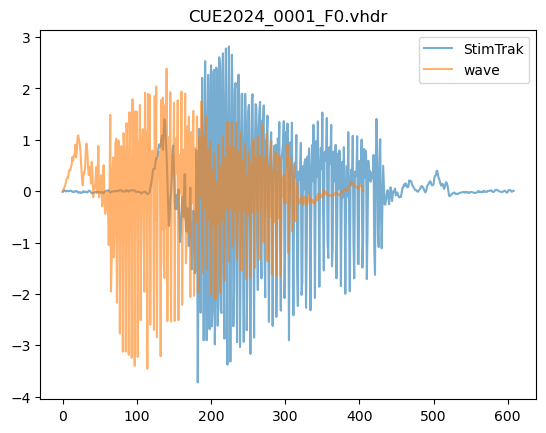

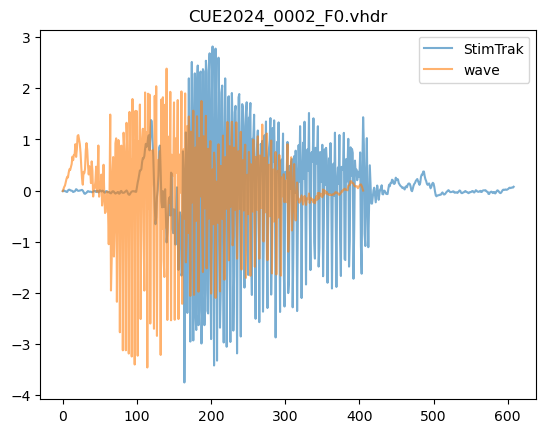

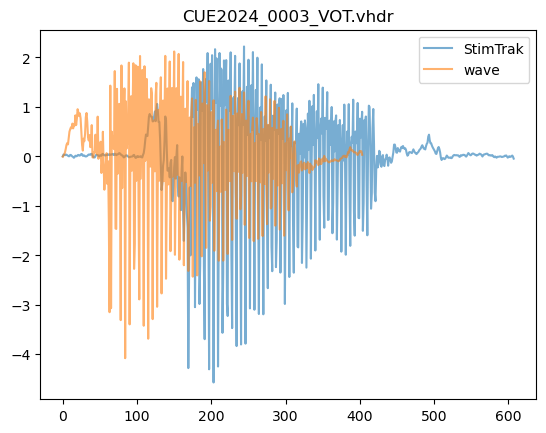

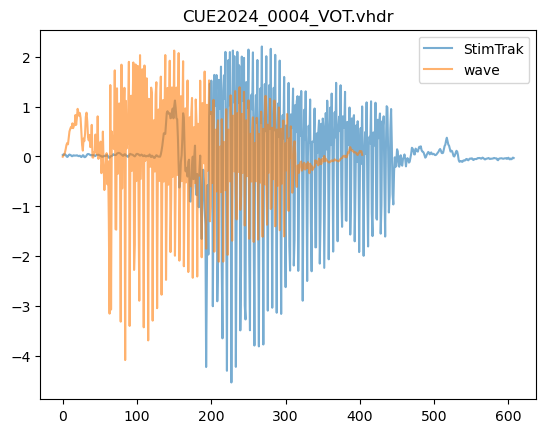

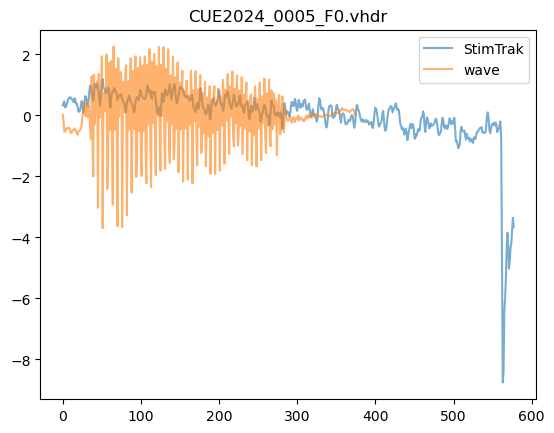

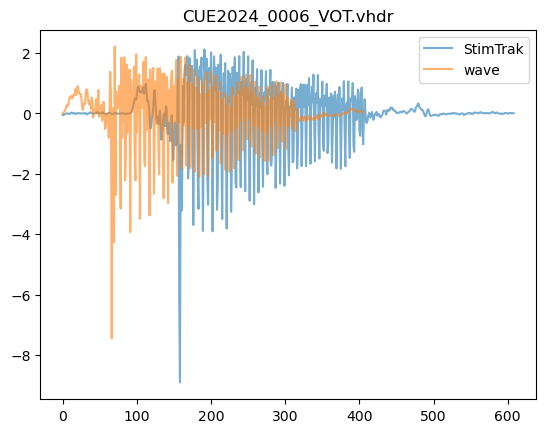

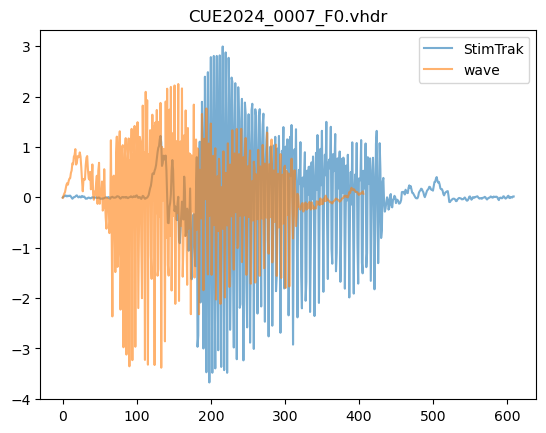

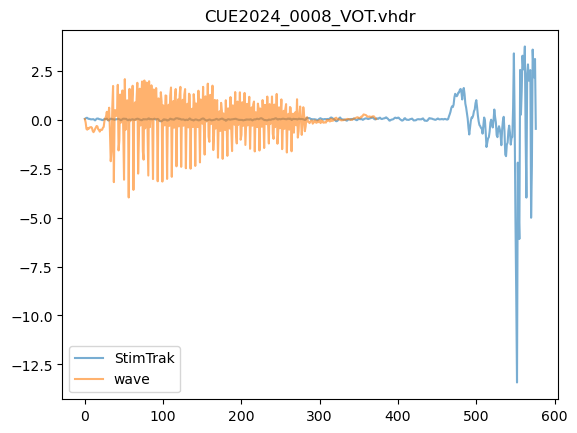

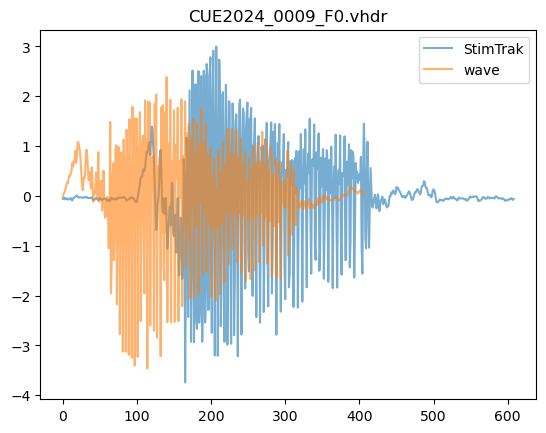

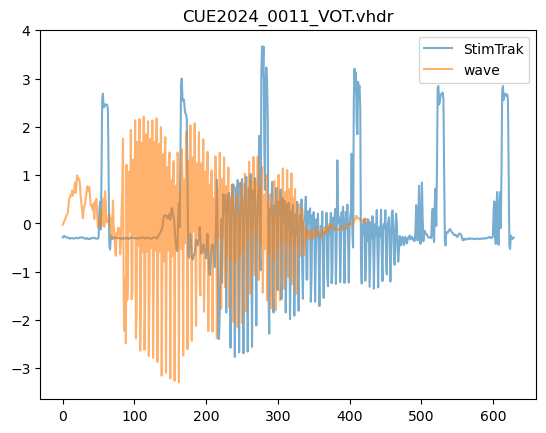

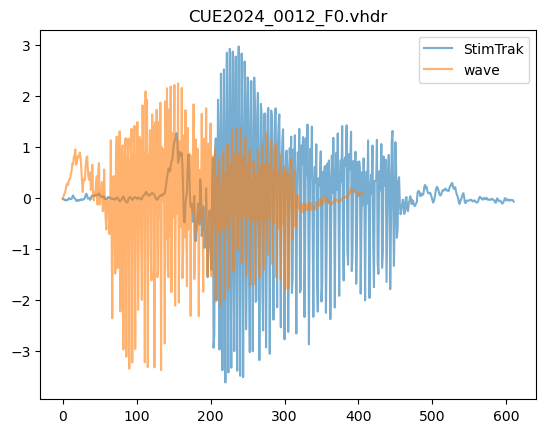

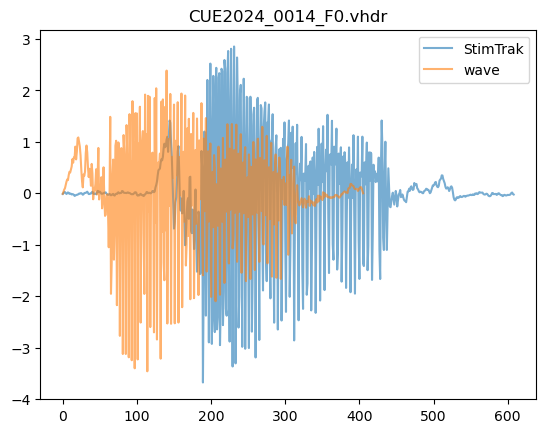

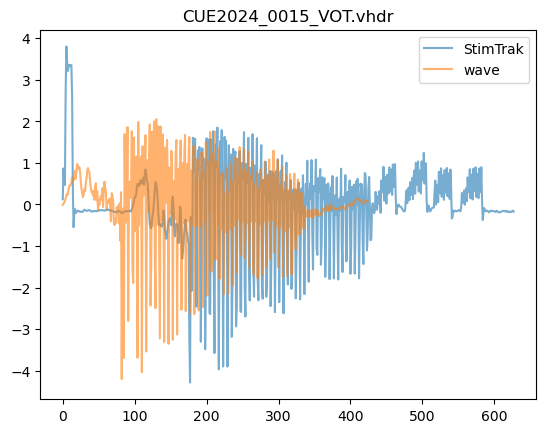

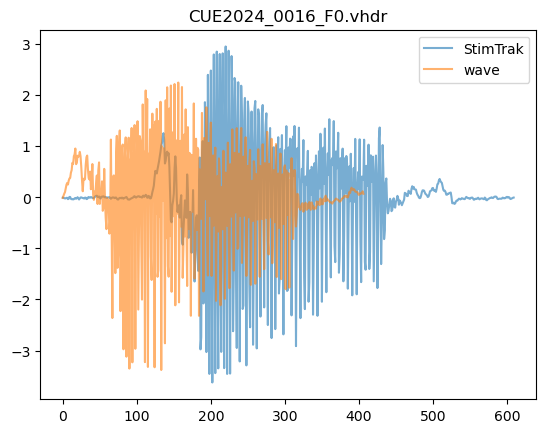

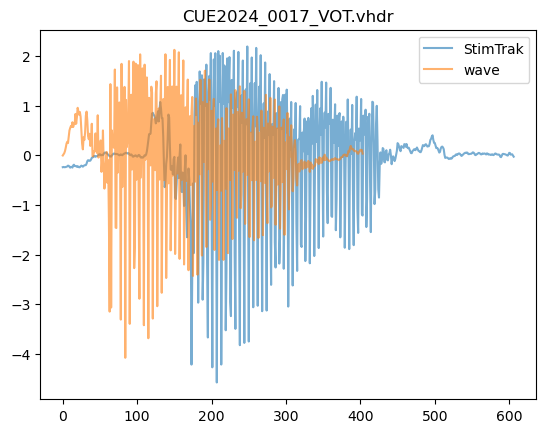

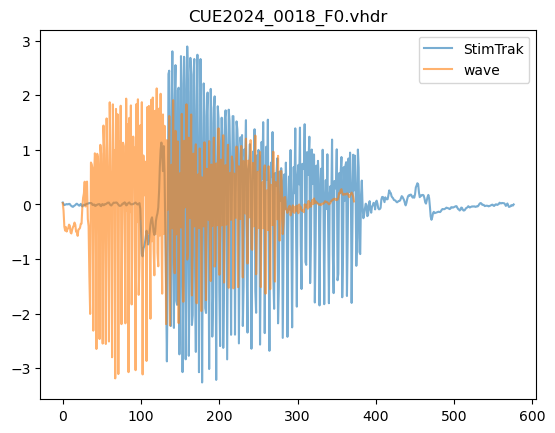

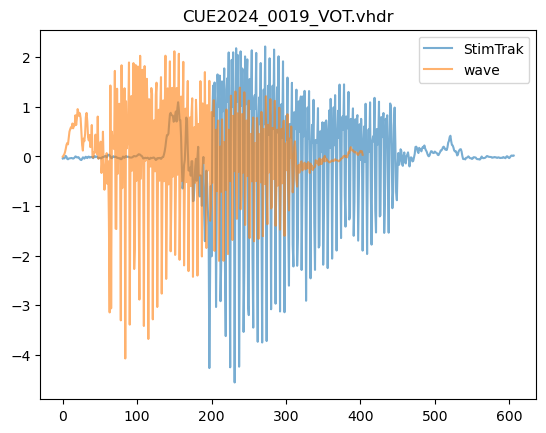

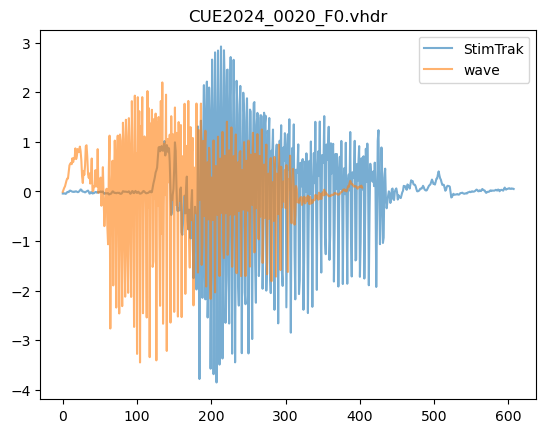

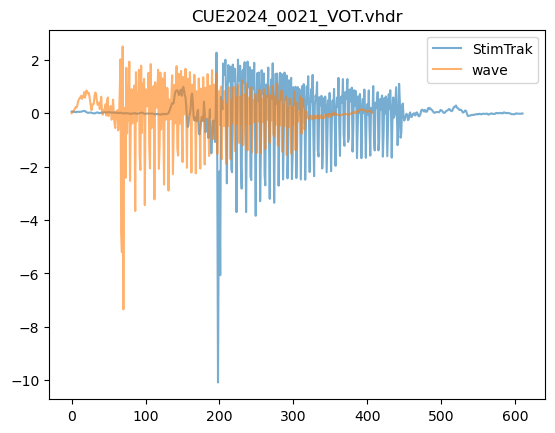

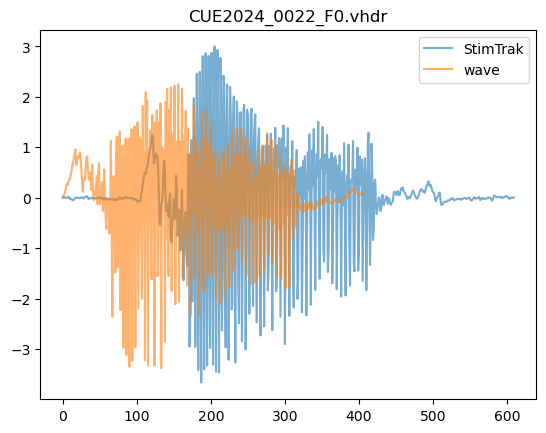

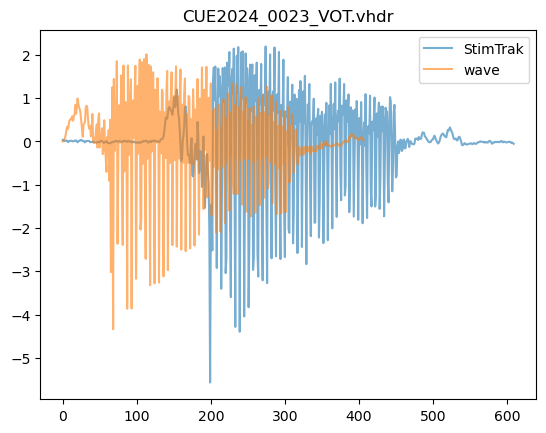

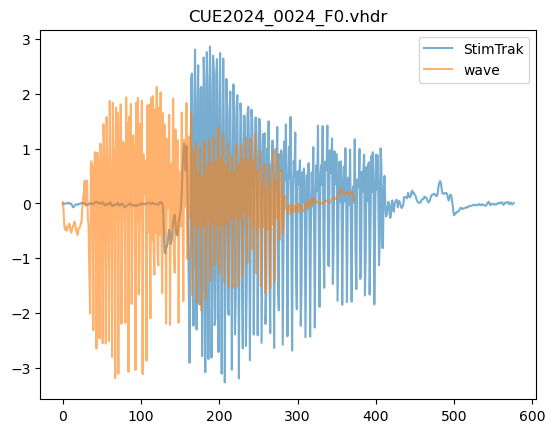

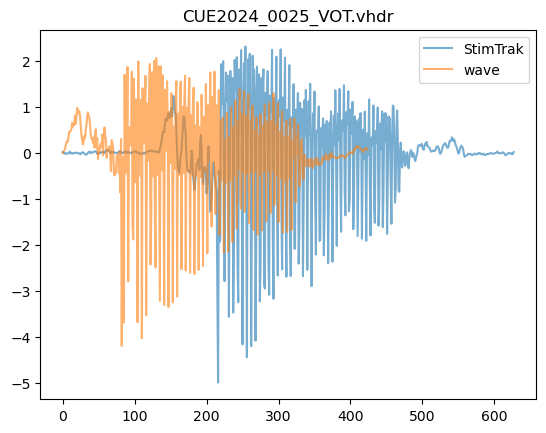

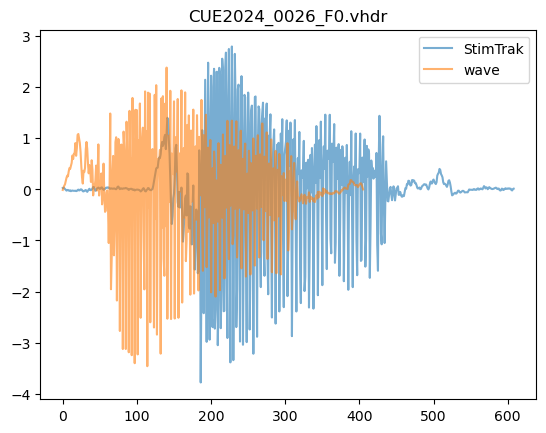

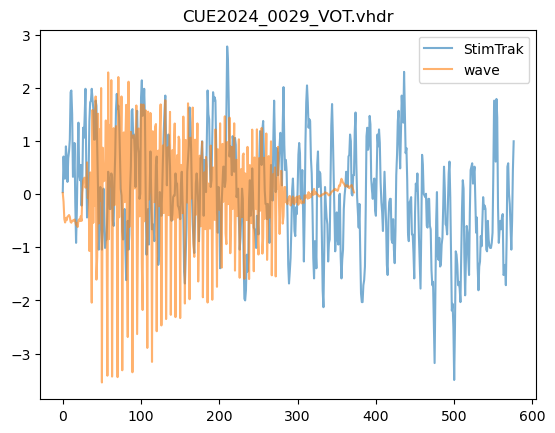

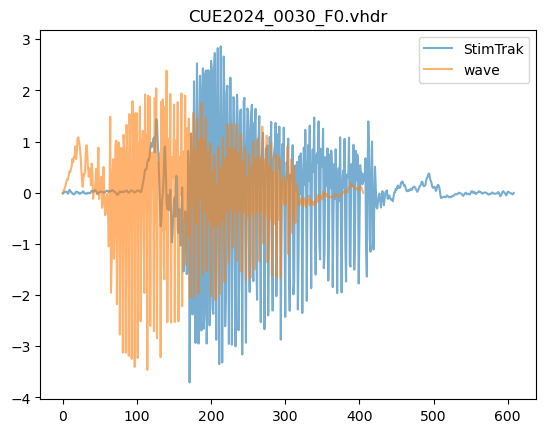

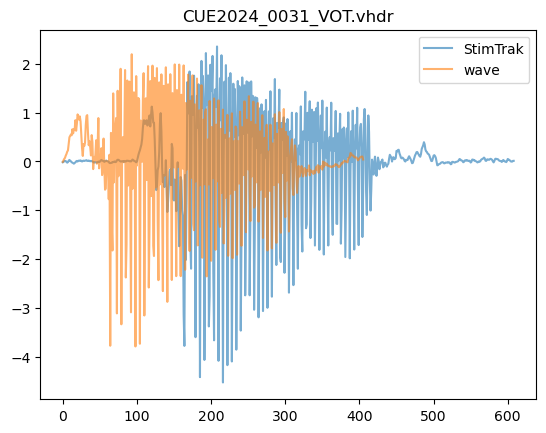

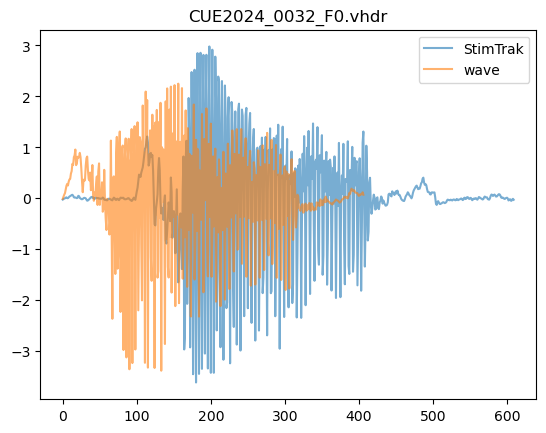

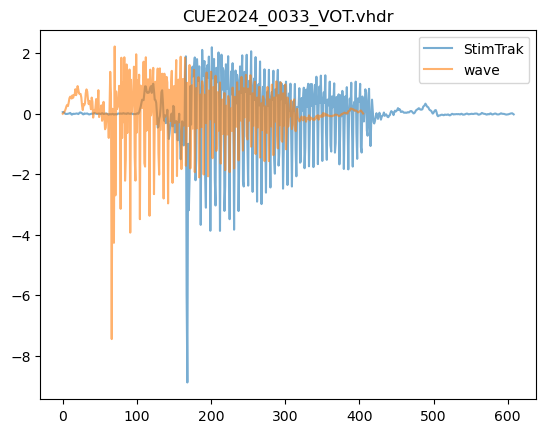

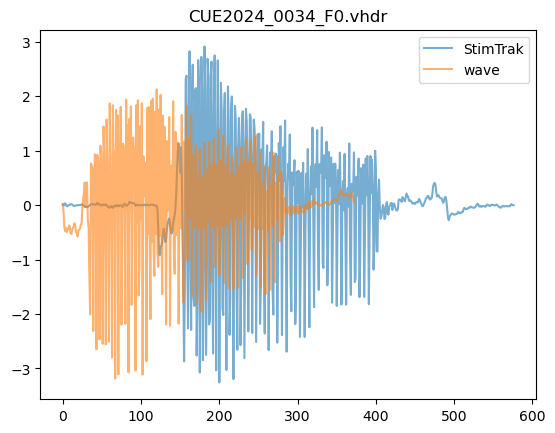

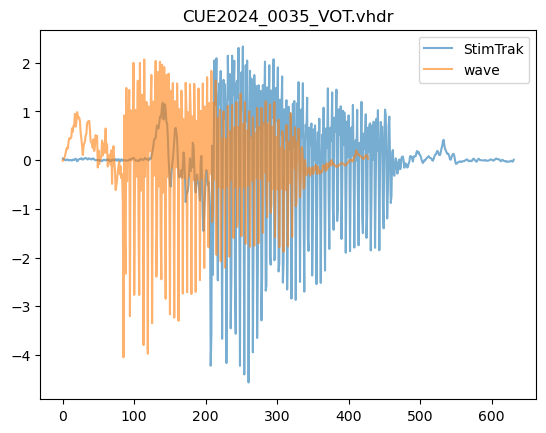

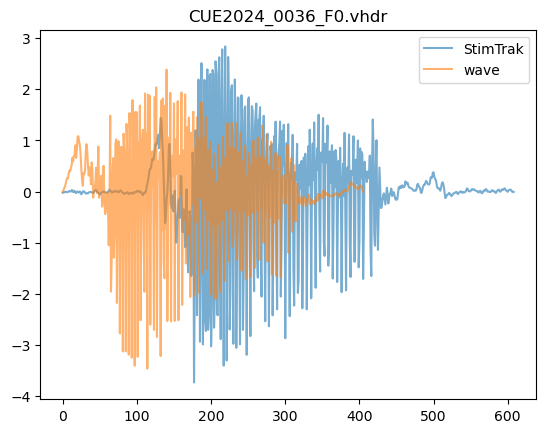

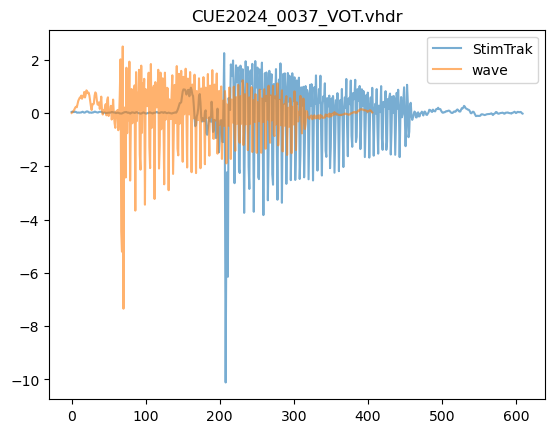

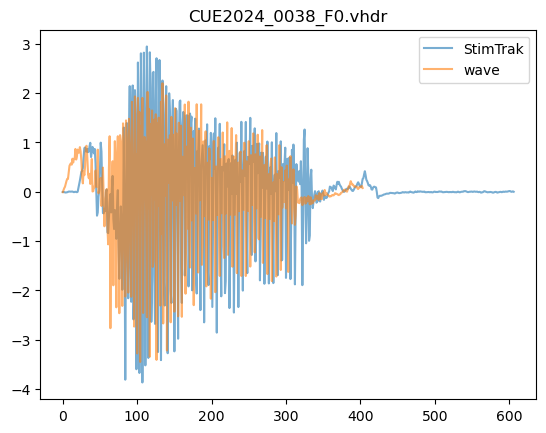

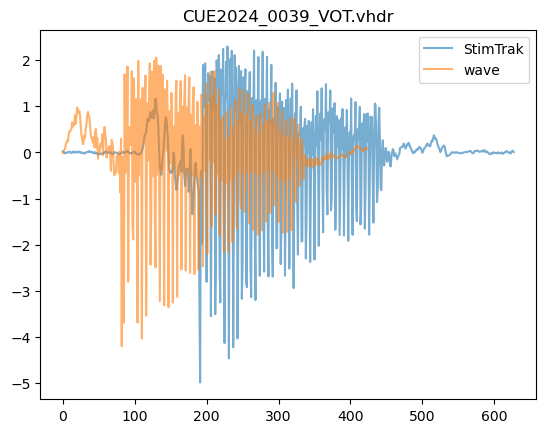

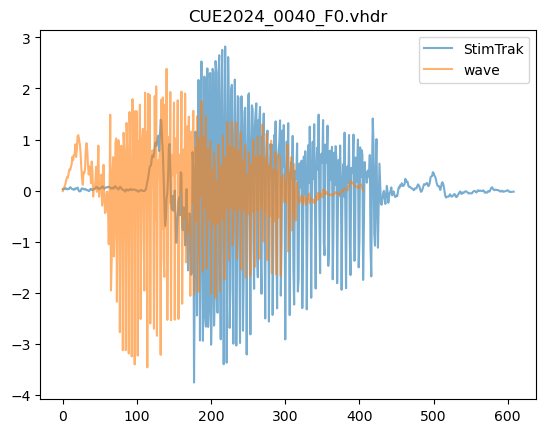

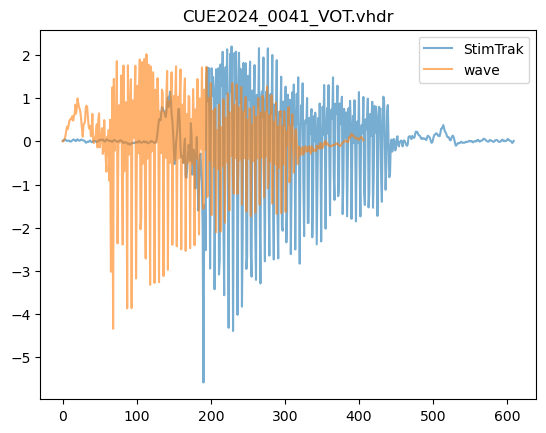

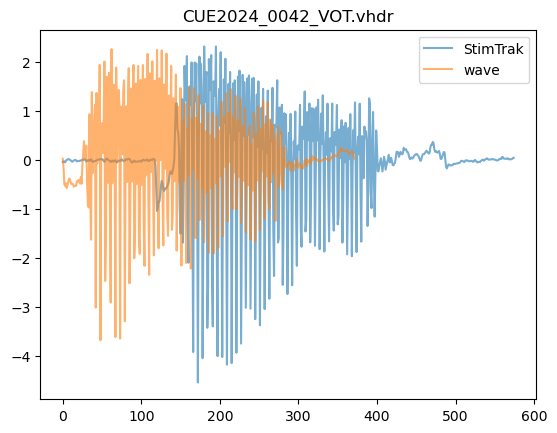

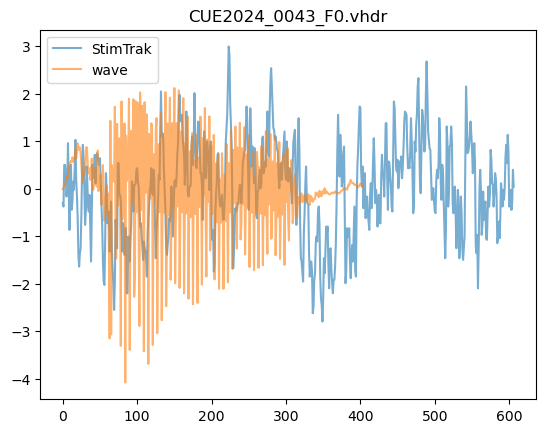

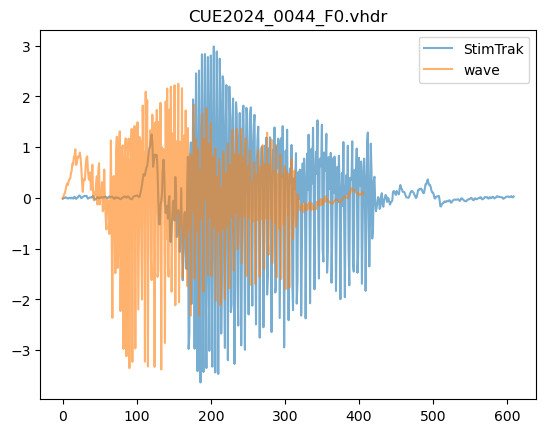

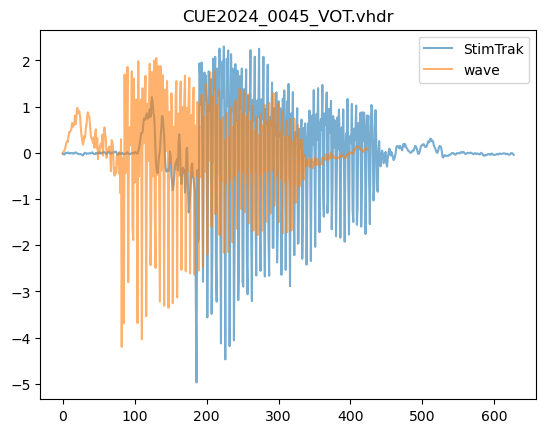

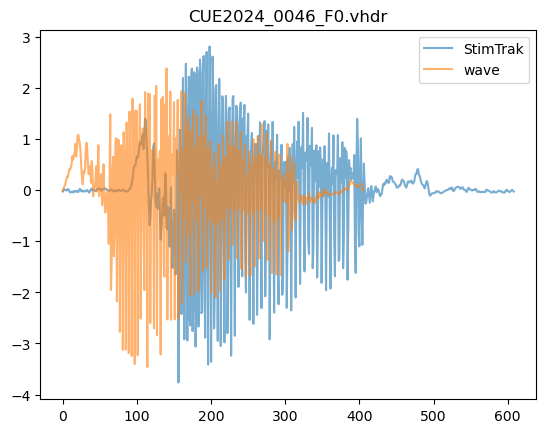

In [6]:
#######################################################
#### create a dictionary for trigger codes and descriptions ####
df = pd.read_csv("vot_mapping.txt", delimiter='\t')
VOT_mapping = dict(zip(df['code'], df['description']))  # key = 'id', value = 'name'

df = pd.read_csv("f0_mapping.txt", delimiter='\t')
F0_mapping = dict(zip(df['code'], df['description']))  # key = 'id', value = 'name'
#######################################################

# initialize a dictionary to save bad stims
all_bad_stim_dict = {}

# read in eeg data files
all_files = os.listdir(input_dir)

#### for each file, create a dictionary to store each block and the indices of trials of that block  ####
for file in all_files:
    if file.endswith('.vhdr') and (file.split('_')[1] not in exclude_ppts) and (file.split('.')[0]+ '_corr.fif' not in os.listdir(output_dir)):

        # read in vhdr files
        raw = mne.io.read_raw_brainvision(input_dir + file, preload = True)

        # If the aux channel is not named 'StimTrak', change the channel name to 'StimTrak'
        if raw.info['ch_names'][31] != 'StimTrak':
            # change the channel name
            raw.rename_channels({raw.info['ch_names'][31]: 'StimTrak'})
            # specify the audio channel
            raw.set_channel_types({'StimTrak':'misc'})
        
        # extract the info of experiment version
        exp_ver = file.split('.')[0].split('_')[2]

        # extract sampling rate
        eeg_sfreq = raw.info['sfreq']
        
        #############################################################################################
        #### create a dictionary for each stim's standard version and deviant version of markers ####
        
        # intialize a dictionary for triggers
        trigger_dict = {}
        
        # read in trigger_codes file, and create a standard trigger code and a deviant triggre code for each stimulus
        with open('../experiment programs/'+exp_ver+'_eeg/trigger_codes.txt','r') as tf:
            for line in tf:
                # read in the current line
                line = line.replace('\n','')
                # separate fileNames and triggerMarker
                label, marker = line.split('\t')
                # convert trigger markers to integer
                marker = int(marker)
                # create label for stims used as standards
                trigger_dict[marker] = label + '-s'
                # add 100 for deviant marker
                marker_deviant = marker + 100
                # create label for stims used as deviants
                trigger_dict[marker_deviant] = label + '-d'
        #############################################################################################

        ########################
        #### get audio data ####
        
        # initialize dictionaries
        audio = {}
        lengths = {}
        
        # del trigger_dict[99999]
        # for each trigger code and label in the trigger dictionary
        for marker,label in trigger_dict.items():
            # extract file name, up to the -2 character of the label
            file_name = label[:-2]
            # if not already in audio dictionary, get the info of the audio file
            if file_name not in audio:
                # get sample rate and data of the audio file
                sampleRate, data = wavfile.read('../experiment programs/'+exp_ver+'_eeg/stimuli/{}.wav'.format(file_name))
                # calculate sound file length
                lengths[file_name] = len(data)/sampleRate
                # reduce the sampling rate of the audio file by the factor of int(sampleRate/eeg_sfreq)
                data_downsampled = signal.decimate(data, int(sampleRate/eeg_sfreq), ftype='fir')
                # add info the audio dictionary
                audio[file_name] = data_downsampled
        ########################

        ##################################################################
        #### recode trigger marker to reflect condition and stim info ####

        # for each stimulus, mark the block info
        events_from_annot, event_dict = mne.events_from_annotations(raw, verbose='WARNING')
        # remove the New Segment marker (which has a trigger value of 99999) and pause marker (222) and continue marker (223)
        events_from_annot = events_from_annot[events_from_annot[:, 2] < 200]
        
        # initialize the train for each standards+deviant sequence
        train = np.array([]).astype(int)
        
        all_block = {}
        isStandard = True # whether the standard in a train has been noted
        
        # loop over each trigger
        for i in range(events_from_annot.shape[0]):
            # add the current token to the train
            train = np.append(train,i)

            # if the trigger value is smaller than 100 and the standard toggle is true
            if (events_from_annot[i,2]<100) & isStandard:
                # split the file name
                trigger_splitted = trigger_dict[events_from_annot[i,2]].split('_')
                # get the standard category name
                block = trigger_splitted[1] + '_' + trigger_splitted[2] + 'Stan'
                # toggle standard
                isStandard = False

            # if the trigger value is over 100
            elif events_from_annot[i,2]>100:
                # split the file name
                trigger_splitted = trigger_dict[events_from_annot[i,2]].split('_')
                # append the deviant stim category 
                block = block + '_' + trigger_splitted[2] + 'Devi'

                # if the block is not present in all block
                if block not in all_block:
                    # add the new block and the token idx
                    all_block[block] = train[2:] # [2:] to exclude the first 2 standards
                else:
                    # add the token idx to the existing block
                    all_block[block] = np.concatenate([all_block[block],train[2:]],axis = None)

                # reset train
                train = np.array([]).astype(int)

                # toggle standard note
                isStandard = True
        
        # loop over each block and its trigger index
        for k,v in all_block.items():
            # recode the trigger value to reflect block and stim category
            events_from_annot[tuple(v),2] += block_dict[k]

        # exclude the first 2 standards
        events_from_annot = events_from_annot[events_from_annot[:,2]>1000]
        ##################################################################

        
        ######################################################
        #### cross correction to detect the trigger delay ####
        
        # initialize delay list
        delays = np.array([])
        # initialize bad stim list
        bad_stim = []
        corr_results = []
        
        # loop over each event
        for i in range(events_from_annot.shape[0]):
        
            # get current event info [time, duration, annotation]
            event = events_from_annot[i]
            # get the onset latency (s) of the event
            time = event[0]/eeg_sfreq
            # get the file name of the event
            name = trigger_dict[event[2]%100].split('-')[0]
            # get the data from the sound channel
            audio_eeg = raw.get_data(
                picks = ['StimTrak'],
                tmin = time + t_left,
                tmax = time + lengths[name] + t_right,
            )[0]
            # actual stimulus
            audio_stim = audio[name]
            # Z-score normalization (subtract mean, divide by std)
            audio_eeg = (audio_eeg - np.mean(audio_eeg)) / np.std(audio_eeg)
            audio_stim = (audio_stim - np.mean(audio_stim)) / np.std(audio_stim)
            
            # cross-correlation
            corr = signal.correlate(audio_eeg, audio_stim, mode='full')
            # Normalize cross-correlation
            corr = corr / (np.linalg.norm(audio_eeg) * np.linalg.norm(audio_stim))
            # Find peak correlation value
            max_corr = np.max(corr)            
            
            # if the maximum correction (sum of products) is less than a threshold (empirical threshold, 0.5 is generally good)
            if max_corr < 0.5:
                # mark the stim bad
                bad_stim.append(i)

            # append the maximum correlation
            corr_results.append(max_corr)

            
            # the lags for cross-correlation
            lags = signal.correlation_lags(
                audio_eeg.size,
                audio_stim.size,
                mode="full")
            # get the lag of the maximum cross-correlation
            lag = lags[np.argmax(corr)] + t_left*eeg_sfreq
            
            # save the lag for non-starting events
            delays = np.append(delays,lag)
        ######################################################

        ##################################################################################################
        #### plot the wave from the stim track and the eeg channel of the token with the minimum corr ####
        
        min_corr = np.argmin(corr_results)
        # get current event info [time, duration, annotation]
        event = events_from_annot[min_corr]
        # get the onset latency (s) of the event
        time = event[0]/eeg_sfreq
        # get the file name of the event
        name = trigger_dict[event[2]%100].split('-')[0]
        # get the data from the sound channel
        audio_eeg = raw.get_data(
            picks = ['StimTrak'],
            tmin = time + t_left,
            tmax = time + lengths[name] + t_right,
        )[0]
        # actual stimulus
        audio_stim = audio[name]
        # Z-score normalization (subtract mean, divide by std)
        audio_eeg = (audio_eeg - np.mean(audio_eeg)) / np.std(audio_eeg)
        audio_stim = (audio_stim - np.mean(audio_stim)) / np.std(audio_stim)
        # plot
        fig, ax = plt.subplots()
        ax.plot(audio_eeg, label = 'StimTrak', alpha = 0.6)
        ax.plot(audio_stim, label = 'wave', alpha = 0.6)
        ax.set_title(file)
        ax.legend()
        fig.savefig(output_dir + file.split('.')[0] + "_minCor.png", dpi=300, bbox_inches='tight')
        ##################################################################################################

        
        ################################################
        #### correct for trigger lag and save files ####

        # add number of bad stim info
        all_bad_stim_dict[file] = len(bad_stim)
        
        # remove items associated with bad stims from the event list
        events_from_annot = np.delete(events_from_annot, bad_stim, 0)
        
        # remove items associated with bad stims from the delay list
        delays = np.delete(delays, bad_stim, 0)
        
        # add delay back to the onset latency of each event
        events_from_annot[:,0] = events_from_annot[:,0] + delays
        
        # convert individual event marker to conditions
        # events_from_annot[:,2] = events_from_annot[:,2] - events_from_annot[:,2]%100
        
        # create annotations
        annot_from_events = mne.annotations_from_events(
            events = events_from_annot,
            event_desc = eval(exp_ver + '_mapping'),
            sfreq = eeg_sfreq
        )
        
        # set annotations
        raw.set_annotations(annot_from_events)
        
        # drop the audio channel in data
        raw.drop_channels(['StimTrak'])
        
        # save as a file-into-file data
        raw.save(output_dir + file.split('.')[0]+ '_corr.fif')

        # save lag data
        np.savetxt(output_dir + file.replace('.vhdr', '_delays.txt'), delays, fmt='%i')
        ################################################


# save the number of bad stims of all participant
with open(output_dir + 'bad_stim.txt', 'a') as f:
    for key, value in all_bad_stim_dict.items():
        if value > 0:
            f.write(key + '\t' + str(value) + '\n')

# Bad channel correction
- filtering
- resampling
- remove line noise
- bad channel detection & repairing
- add back reference channel TP9

## parameters

In [9]:
# set directory
input_dir = os.getcwd() + '/../preprocessed/1_trigger_lag_corrected/'
output_dir = os.getcwd() + '/../preprocessed/2_bad_channel_corrected/'
# create a folder if the folder doesn't exist
os.makedirs(output_dir, exist_ok=True)

# filter cutoff frequencies (low/high)
f_low = 1
f_high = 100

# resampling frequency
f_res = 250

# line frequency
line_freq = 60

# preprocessing parameters
prep_params = {
    "ref_chs": 'eeg',
    "reref_chs": 'eeg', # average re-reference
    "line_freqs": np.arange(line_freq, f_res/2, line_freq),
}

# create a montage file for the pipeline
montage = mne.channels.make_standard_montage("standard_1020")

# interpolation method
# method=dict(eeg="spline")

In [10]:
#####################################################
#### Preprocessing (filtering, resampling, bad channel detection/interpoloation, re-reference) ####
#####################################################

# get all file namesin the folder
all_input = os.listdir(input_dir)
all_output = os.listdir(output_dir)


for file in all_input:
    if file.endswith("corr.fif") and (file.split('.')[0]+ '_prep.fif' not in all_output):
        
        # read in file
        raw = mne.io.read_raw_fif(input_dir + file, preload=True)

        # set channel type
        raw.set_channel_types({'Fp1':'eog', 'Fp2':'eog'})

        # filter
        raw.filter(l_freq = f_low, h_freq = f_high)
        
        #### cut off the beginning and ending part ####
        
        # get the onset of the first and the last event ####
        events_from_annot, event_dict = mne.events_from_annotations(raw, verbose='WARNING')

        # define the beginning time (in seconds)
        crop_start = events_from_annot[0][0]/raw.info['sfreq'] - 10

        # define the ending time (in seconds)
        crop_end = events_from_annot[-1][0]/raw.info['sfreq'] + 10

        # crop the data
        raw.crop(
            tmin=max(crop_start, raw.times[0]), 
            tmax=min(crop_end, raw.times[-1])
        )
        
        # resample
        raw.resample(sfreq = f_res)

        # read in channel location info
        raw.set_montage(montage)
        
        ####  Use PrePipeline to preprocess ####
        '''
        1. detect and interpolate bad channels
        2. remove line noise
        3. re-reference
        '''

        # apply pyprep
        prep = PrepPipeline(raw, prep_params, montage, random_state=42)
        prep.fit()
        
        # export a txt file for the interpolated channel info
        with open(output_dir + 'bad_channel.txt', 'a+') as f:
            _ =f.write(
                file + ':\n' +
                "- Bad channels original: {}".format(prep.noisy_channels_original["bad_all"]) + '\n' +
                "- Bad channels after robust average reference: {}".format(prep.interpolated_channels) + '\n' +
                "- Bad channels after interpolation: {}".format(prep.still_noisy_channels) + '\n'
            )

        # save the pyprep preprocessed data
        raw = prep.raw

        # add back the reference channel
        raw = mne.add_reference_channels(raw,'TP9')

        # add the channel loc info (for the newly added reference channel)
        raw.set_montage(montage)
        
        # save
        raw.save(output_dir + file.split('.')[0]+ '_prep.fif')

Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0001_F0_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0001_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 1907999 =      0.000 ...  3815.998 secs
Ready.
Reading 0 ... 1907999  =      0.000 ...  3815.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.6s
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Removed notch frequencies (Hz):
     60.00 : 21982 windows
    120.00 : 21982 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/759 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 19:48:24,581 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': []}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/759 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 19:49:34,139 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['T8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['FT10'], 'bad_all': ['FT10', 'T8']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 2 sensors


2025-06-04 19:49:34,998 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/759 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 19:50:43,243 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FC6', 'T8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['FT10'], 'bad_all': ['FC6', 'FT10', 'T8']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 3 sensors


2025-06-04 19:50:44,259 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/759 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 19:51:51,170 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FC6', 'T8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['FT10'], 'bad_all': ['FC6', 'FT10', 'T8']}
2025-06-04 19:51:51,170 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 3 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/759 [00:00<?,       ?it/s]


RANSAC done!
Found 2 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

0 by HF noise: []

2 by correlation: ['T8', 'FC6']

0 by SNR: []

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 2 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/759 [00:00<?,       ?it/s]


RANSAC done!


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')


Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0001_F0_corr_prep.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0001_F0_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_prep.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0001_F0_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0002_F0_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0002_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 1966479 =      0.000 ...  3932.958 secs
Ready.
Reading 0 ... 1966479  =      0.000 ...  3932.958 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.2s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Removed notch frequencies (Hz):
     60.00 : 22707 windows
    120.00 : 22707 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/784 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 19:57:08,509 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': []}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/784 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 19:58:22,791 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['T8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['T8']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors


2025-06-04 19:58:23,697 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/784 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 19:59:34,099 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['T8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['T8']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors


2025-06-04 19:59:35,146 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/784 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 20:00:47,646 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['T8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['FT9'], 'bad_all': ['FT9', 'T8']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 2 sensors


2025-06-04 20:00:48,552 - pyprep.reference - INFO - Iterations: 3


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/784 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 20:02:01,835 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['T8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['FT9'], 'bad_all': ['FT9', 'T8']}
2025-06-04 20:02:01,835 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 2 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/784 [00:00<?,       ?it/s]


RANSAC done!
Found 1 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

0 by HF noise: []

1 by correlation: ['T8']

0 by SNR: []

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/784 [00:00<?,       ?it/s]


RANSAC done!
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0002_F0_corr_prep.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0002_F0_corr_prep.fif) does not conform to MNE naming convent

Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0002_F0_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0003_VOT_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0003_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 2064139 =      0.000 ...  4128.278 secs
Ready.
Reading 0 ... 2064139  =      0.000 ...  4128.278 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.0s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Removed notch frequencies (Hz):
     60.00 : 23432 windows
    120.00 : 23432 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/809 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 20:06:52,969 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FT9', 'T7', 'TP10'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['T8'], 'bad_all': ['FT9', 'TP10', 'T8', 'T7']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/809 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 20:08:02,337 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['F3', 'T7', 'FC6', 'T8', 'FT10'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['FT9', 'TP10'], 'bad_all': ['F3', 'TP10', 'T7', 'FC6', 'T8', 'FT10', 'FT9']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 22 sensor positions
Interpolating 7 sensors


2025-06-04 20:08:03,478 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/809 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 20:09:06,267 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['FC6'], 'bad_by_correlation': ['F3', 'TP10', 'FC5', 'T7', 'FC6', 'C4', 'T8', 'FT10'], 'bad_by_SNR': ['FC6'], 'bad_by_dropout': [], 'bad_by_ransac': ['FT9', 'TP10'], 'bad_all': ['F3', 'TP10', 'FC5', 'T7', 'FC6', 'C4', 'T8', 'FT10', 'FT9']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 20 sensor positions
Interpolating 9 sensors


2025-06-04 20:09:07,236 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/809 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 20:10:12,583 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['FC6'], 'bad_by_correlation': ['F3', 'TP10', 'FC5', 'T7', 'FC6', 'C4', 'T8', 'FT10'], 'bad_by_SNR': ['FC6'], 'bad_by_dropout': [], 'bad_by_ransac': ['FT10', 'FT9', 'TP10'], 'bad_all': ['F3', 'TP10', 'FC5', 'T7', 'FC6', 'C4', 'T8', 'FT10', 'FT9']}
2025-06-04 20:10:12,583 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 20 sensor positions
Interpolating 9 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/809 [00:00<?,       ?it/s]


RANSAC done!
Found 7 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

1 by HF noise: ['FC6']

6 by correlation: ['F3', 'T7', 'TP10', 'C4', 'T8', 'FC6']

1 by SNR: ['FC6']

0 by dropout: []

1 by RANSAC: ['FT10']

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 22 sensor positions
Interpolating 7 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/809 [00:00<?,       ?it/s]


RANSAC done!


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')


Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0003_VOT_corr_prep.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0003_VOT_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_prep.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0003_VOT_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0004_VOT_corr.fif...
Isotrak not found
    Range : 0 ... 1856059 =      0.000 ...  3712.118 secs
Ready.


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0004_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Reading 0 ... 1856059  =      0.000 ...  3712.118 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Removed notch frequencies (Hz):
     60.00 : 21373 windows
    120.00 : 21373 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/738 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 20:14:54,350 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['T7']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/738 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 20:16:01,611 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FC6'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['FC6']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors


2025-06-04 20:16:02,424 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/738 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 20:17:11,946 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FC6'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['FC6']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors


2025-06-04 20:17:12,945 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/738 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 20:18:19,421 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FC6'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['FC6']}
2025-06-04 20:18:19,421 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/738 [00:00<?,       ?it/s]


RANSAC done!
Found 1 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

0 by HF noise: []

1 by correlation: ['FC6']

0 by SNR: []

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/738 [00:00<?,       ?it/s]


RANSAC done!


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')


Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0004_VOT_corr_prep.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0004_VOT_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_prep.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0004_VOT_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0005_F0_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0005_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 1634399 =      0.000 ...  3268.798 secs
Ready.
Reading 0 ... 1634399  =      0.000 ...  3268.798 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.4s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Removed notch frequencies (Hz):
     60.00 : 18647 windows
    120.00 : 18647 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/644 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 20:22:36,846 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FT9'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['FT9']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/644 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 20:23:36,904 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['FT10'], 'bad_all': ['FT10']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors


2025-06-04 20:23:37,716 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/644 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 20:24:35,223 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['C3', 'C4'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['FT10'], 'bad_all': ['FT10', 'C3', 'C4']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 3 sensors


2025-06-04 20:24:36,030 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/644 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 20:25:32,120 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['C3', 'C4'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['FT10'], 'bad_all': ['FT10', 'C3', 'C4']}
2025-06-04 20:25:32,120 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 3 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/644 [00:00<?,       ?it/s]


RANSAC done!
Found 3 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

0 by HF noise: []

2 by correlation: ['C3', 'C4']

0 by SNR: []

0 by dropout: []

1 by RANSAC: ['FT10']

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 3 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/644 [00:00<?,       ?it/s]


RANSAC done!


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0005_F0_corr_prep.fif) does not conform to MNE naming convent

Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0005_F0_corr_prep.fif
Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0005_F0_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0006_VOT_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0006_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 2086569 =      0.000 ...  4173.138 secs
Ready.
Reading 0 ... 2086569  =      0.000 ...  4173.138 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Removed notch frequencies (Hz):
     60.00 : 23867 windows
    120.00 : 23867 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/824 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 20:30:06,631 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['T7']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/824 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 20:31:23,708 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['T8', 'T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['T7', 'T8']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 2 sensors


2025-06-04 20:31:24,677 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/824 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 20:32:40,751 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['T7', 'T8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['T8', 'T7']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 2 sensors


2025-06-04 20:32:41,751 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/824 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 20:33:52,761 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['T8', 'T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['T7', 'T8']}
2025-06-04 20:33:52,761 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 2 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/824 [00:00<?,       ?it/s]


RANSAC done!
Found 2 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

0 by HF noise: []

2 by correlation: ['T7', 'T8']

0 by SNR: []

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 2 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/824 [00:00<?,       ?it/s]


RANSAC done!
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0006_VOT_corr_prep.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0006_VOT_corr_prep.fif) does not conform to MNE naming conven

Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0006_VOT_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0007_F0_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0007_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 2137609 =      0.000 ...  4275.218 secs
Ready.
Reading 0 ... 2137609  =      0.000 ...  4275.218 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.4s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Removed notch frequencies (Hz):
     60.00 : 24563 windows
    120.00 : 24563 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/848 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 20:39:13,165 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['Pz'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['Pz']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/848 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 20:40:32,819 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['T7']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors


2025-06-04 20:40:33,874 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/848 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 20:41:49,531 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['T7']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors


2025-06-04 20:41:50,500 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/848 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 20:43:07,095 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['T7']}
2025-06-04 20:43:07,095 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/848 [00:00<?,       ?it/s]


RANSAC done!
Found 1 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

0 by HF noise: []

1 by correlation: ['T7']

0 by SNR: []

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/848 [00:00<?,       ?it/s]


RANSAC done!


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')


Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0007_F0_corr_prep.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0007_F0_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_prep.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0007_F0_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0008_VOT_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0008_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 2166069 =      0.000 ...  4332.138 secs
Ready.
Reading 0 ... 2166069  =      0.000 ...  4332.138 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.4s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Removed notch frequencies (Hz):
     60.00 : 25027 windows
    120.00 : 25027 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/864 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 20:48:45,185 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': []}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/864 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 20:50:07,460 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['FT10'], 'bad_all': ['FT10']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors


2025-06-04 20:50:08,445 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/864 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 20:51:27,295 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['F7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['FT10', 'FT9'], 'bad_all': ['FT10', 'FT9', 'F7']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 3 sensors


2025-06-04 20:51:28,263 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/864 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 20:52:46,756 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['F7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['FT10', 'FT9'], 'bad_all': ['FT10', 'FT9', 'F7']}
2025-06-04 20:52:46,756 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 3 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/864 [00:00<?,       ?it/s]


RANSAC done!
Found 1 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

0 by HF noise: []

1 by correlation: ['F7']

0 by SNR: []

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/864 [00:00<?,       ?it/s]


RANSAC done!


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0008_VOT_corr_prep.fif) does not conform to MNE naming conven

Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0008_VOT_corr_prep.fif
Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0008_VOT_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0009_F0_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0009_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 2056209 =      0.000 ...  4112.418 secs
Ready.
Reading 0 ... 2056209  =      0.000 ...  4112.418 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.8s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Removed notch frequencies (Hz):
     60.00 : 23780 windows
    120.00 : 23780 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/821 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 20:58:03,950 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FT9', 'T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['FT9', 'T7']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/821 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 20:59:16,512 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FT10', 'CP2', 'FC6', 'T8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['FT10', 'CP2', 'FC6', 'T8']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 4 sensors


2025-06-04 20:59:17,605 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/821 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 21:00:24,679 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['CP2', 'T7', 'FC6', 'T8', 'FT10', 'FT9'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['CP2', 'T7', 'FC6', 'T8', 'FT10', 'FT9']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 23 sensor positions
Interpolating 6 sensors


2025-06-04 21:00:25,705 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/821 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 21:01:34,394 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['CP2', 'T7', 'FC6', 'T8', 'FT10', 'FT9'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['CP2', 'T7', 'FC6', 'T8', 'FT10', 'FT9']}
2025-06-04 21:01:34,394 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 23 sensor positions
Interpolating 6 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/821 [00:00<?,       ?it/s]


RANSAC done!
Found 5 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

0 by HF noise: []

5 by correlation: ['FT9', 'T7', 'T8', 'FT10', 'FC6']

0 by SNR: []

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 24 sensor positions
Interpolating 5 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/821 [00:00<?,       ?it/s]


RANSAC done!


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')


Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0009_F0_corr_prep.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0009_F0_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_prep.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0009_F0_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0011_VOT_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0011_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 2065709 =      0.000 ...  4131.418 secs
Ready.
Reading 0 ... 2065709  =      0.000 ...  4131.418 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.8s
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Removed notch frequencies (Hz):
     60.00 : 23867 windows
    120.00 : 23867 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/824 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 21:06:36,994 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FT9', 'T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['FT9', 'T7']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/824 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 21:07:56,018 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FT9', 'T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['FT9', 'T7']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 2 sensors


2025-06-04 21:07:56,924 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/824 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 21:09:10,123 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FT9', 'T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['FT9', 'T7']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 2 sensors


2025-06-04 21:09:11,123 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/824 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 21:10:26,910 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FT9', 'T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['FT9', 'T7']}
2025-06-04 21:10:26,910 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 2 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/824 [00:00<?,       ?it/s]


RANSAC done!
Found 2 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

0 by HF noise: []

2 by correlation: ['FT9', 'T7']

0 by SNR: []

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 2 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/824 [00:00<?,       ?it/s]


RANSAC done!


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')


Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0011_VOT_corr_prep.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0011_VOT_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_prep.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0011_VOT_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0012_F0_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0012_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 2050969 =      0.000 ...  4101.938 secs
Ready.
Reading 0 ... 2050969  =      0.000 ...  4101.938 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Removed notch frequencies (Hz):
     60.00 : 23751 windows
    120.00 : 23751 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/820 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 21:15:21,414 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FC5', 'T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['FC5', 'T7']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/820 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 21:16:30,909 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['FC6'], 'bad_by_correlation': ['FC6', 'FC5', 'CP5'], 'bad_by_SNR': ['FC6'], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['FC6', 'FC5', 'CP5']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 3 sensors


2025-06-04 21:16:31,878 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/820 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 21:17:46,013 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['FC6'], 'bad_by_correlation': ['FC6', 'FC5', 'CP5'], 'bad_by_SNR': ['FC6'], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['FC6', 'FC5', 'CP5']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 3 sensors


2025-06-04 21:17:46,904 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/820 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 21:18:56,805 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['FC6'], 'bad_by_correlation': ['FC6', 'FC5', 'CP5'], 'bad_by_SNR': ['FC6'], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['FC6', 'FC5', 'CP5']}
2025-06-04 21:18:56,805 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 3 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/820 [00:00<?,       ?it/s]


RANSAC done!
Found 2 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

1 by HF noise: ['FC6']

2 by correlation: ['FC5', 'FC6']

1 by SNR: ['FC6']

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 2 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/820 [00:00<?,       ?it/s]


RANSAC done!
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0012_F0_corr_prep.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0012_F0_corr_prep.fif) does not conform to MNE naming convent

Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0012_F0_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0014_F0_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0014_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 2080239 =      0.000 ...  4160.478 secs
Ready.
Reading 0 ... 2080239  =      0.000 ...  4160.478 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.8s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Removed notch frequencies (Hz):
     60.00 : 24070 windows
    120.00 : 24070 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/831 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 21:23:49,774 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FT9'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['FT9']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/831 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 21:24:56,590 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['CP2', 'FT9', 'C3', 'Pz', 'Cz'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['CP2', 'FT9', 'C3', 'Pz', 'Cz']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 24 sensor positions
Interpolating 5 sensors


2025-06-04 21:24:57,933 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/831 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 21:26:03,902 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['CP2', 'CP5', 'FT9', 'C3', 'Pz', 'Cz'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['CP2', 'CP5', 'FT9', 'C3', 'Pz', 'Cz']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 23 sensor positions
Interpolating 6 sensors


2025-06-04 21:26:04,839 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/831 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 21:27:11,412 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['CP2', 'CP5', 'FT9', 'C3', 'Pz', 'Cz'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['CP2', 'CP5', 'FT9', 'C3', 'Pz', 'Cz']}
2025-06-04 21:27:11,412 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 23 sensor positions
Interpolating 6 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/831 [00:00<?,       ?it/s]


RANSAC done!
Found 4 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

0 by HF noise: []

4 by correlation: ['FT9', 'C3', 'CP5', 'Cz']

0 by SNR: []

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 4 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/831 [00:00<?,       ?it/s]


RANSAC done!


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')


Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0014_F0_corr_prep.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0014_F0_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_prep.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0014_F0_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0015_VOT_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0015_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 2118439 =      0.000 ...  4236.878 secs
Ready.
Reading 0 ... 2118439  =      0.000 ...  4236.878 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.8s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Removed notch frequencies (Hz):
     60.00 : 24534 windows
    120.00 : 24534 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/847 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 21:32:10,818 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': []}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/847 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 21:33:32,507 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['P8'], 'bad_all': ['P8']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors


2025-06-04 21:33:33,445 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/847 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 21:34:46,949 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['P8', 'TP10'], 'bad_all': ['P8', 'TP10']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 2 sensors


2025-06-04 21:34:47,824 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/847 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 21:36:02,325 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['P8', 'TP10'], 'bad_all': ['P8', 'TP10', 'T7']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 3 sensors


2025-06-04 21:36:03,247 - pyprep.reference - INFO - Iterations: 3


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/847 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 21:37:17,747 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['P8', 'TP10'], 'bad_all': ['P8', 'TP10', 'T7']}
2025-06-04 21:37:17,747 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 3 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/847 [00:00<?,       ?it/s]


RANSAC done!
Found 1 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

0 by HF noise: []

0 by correlation: []

0 by SNR: []

0 by dropout: []

1 by RANSAC: ['P8']

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/847 [00:00<?,       ?it/s]


RANSAC done!


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')


Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0015_VOT_corr_prep.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0015_VOT_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_prep.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0015_VOT_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0016_F0_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0016_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 2022339 =      0.000 ...  4044.678 secs
Ready.
Reading 0 ... 2022339  =      0.000 ...  4044.678 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.9s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Removed notch frequencies (Hz):
     60.00 : 23403 windows
    120.00 : 23403 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/808 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 21:42:13,598 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FT9', 'T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['FT9', 'T7']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/808 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 21:43:24,701 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['T7'], 'bad_by_correlation': ['CP2', 'T7'], 'bad_by_SNR': ['T7'], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['CP2', 'T7']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 2 sensors


2025-06-04 21:43:25,670 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/808 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 21:44:34,415 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['T7'], 'bad_by_correlation': ['CP2', 'T7'], 'bad_by_SNR': ['T7'], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['CP2', 'T7']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 2 sensors


2025-06-04 21:44:35,321 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/808 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 21:45:44,910 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['T7'], 'bad_by_correlation': ['CP2', 'T7'], 'bad_by_SNR': ['T7'], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['CP2', 'T7']}
2025-06-04 21:45:44,910 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 2 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/808 [00:00<?,       ?it/s]


RANSAC done!
Found 1 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

1 by HF noise: ['T7']

1 by correlation: ['T7']

1 by SNR: ['T7']

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/808 [00:00<?,       ?it/s]


RANSAC done!
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0016_F0_corr_prep.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0016_F0_corr_prep.fif) does not conform to MNE naming convent

Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0016_F0_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0017_VOT_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0017_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 2068769 =      0.000 ...  4137.538 secs
Ready.
Reading 0 ... 2068769  =      0.000 ...  4137.538 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.8s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Removed notch frequencies (Hz):
     60.00 : 23954 windows
    120.00 : 23954 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/827 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 21:50:38,154 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['FT9'], 'bad_all': ['FT9', 'T7']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/827 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 21:51:54,674 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': []}
2025-06-04 21:51:55,361 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/827 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 21:53:04,169 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FT9', 'T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['FT9', 'T7']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 2 sensors


2025-06-04 21:53:05,122 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/827 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 21:54:18,837 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FT9', 'T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['FT9', 'T7']}
2025-06-04 21:54:18,837 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 2 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/827 [00:00<?,       ?it/s]


RANSAC done!
Found 0 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

0 by HF noise: []

0 by correlation: []

0 by SNR: []

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.


C:\Users\hanch\anaconda3\Lib\site-packages\pyprep\reference.py:155: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  self.raw.interpolate_bads()


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/827 [00:00<?,       ?it/s]


RANSAC done!


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')


Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0017_VOT_corr_prep.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0017_VOT_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_prep.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0017_VOT_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0018_F0_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0018_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 2068919 =      0.000 ...  4137.838 secs
Ready.
Reading 0 ... 2068919  =      0.000 ...  4137.838 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.6s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Removed notch frequencies (Hz):
     60.00 : 23925 windows
    120.00 : 23925 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/826 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 21:59:16,074 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': []}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/826 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 22:00:31,452 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': []}
2025-06-04 22:00:32,155 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/826 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 22:01:45,391 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': []}
2025-06-04 22:01:46,126 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/826 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 22:03:00,370 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': []}
2025-06-04 22:03:00,370 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.


C:\Users\hanch\anaconda3\Lib\site-packages\pyprep\reference.py:125: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  dummy.interpolate_bads()


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/826 [00:00<?,       ?it/s]


RANSAC done!
Found 0 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

0 by HF noise: []

0 by correlation: []

0 by SNR: []

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.


C:\Users\hanch\anaconda3\Lib\site-packages\pyprep\reference.py:155: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  self.raw.interpolate_bads()


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/826 [00:00<?,       ?it/s]


RANSAC done!
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0018_F0_corr_prep.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0018_F0_corr_prep.fif) does not conform to MNE naming convent

Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0018_F0_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0019_VOT_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0019_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 2073289 =      0.000 ...  4146.578 secs
Ready.
Reading 0 ... 2073289  =      0.000 ...  4146.578 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Removed notch frequencies (Hz):
     60.00 : 23867 windows
    120.00 : 23867 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/824 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 22:07:59,287 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': ['T8'], 'bad_by_hf_noise': [], 'bad_by_correlation': ['T8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['T8']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/824 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 22:09:09,438 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': ['T8'], 'bad_by_hf_noise': [], 'bad_by_correlation': ['TP10', 'F8', 'T8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['TP10', 'F8', 'T8']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 3 sensors


2025-06-04 22:09:10,360 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/824 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 22:10:19,026 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': ['T8'], 'bad_by_hf_noise': [], 'bad_by_correlation': ['TP10', 'F8', 'T8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['TP10', 'F8', 'T8']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 3 sensors


2025-06-04 22:10:19,933 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/824 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 22:11:28,023 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': ['T8'], 'bad_by_hf_noise': [], 'bad_by_correlation': ['TP10', 'F8', 'T8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['TP10', 'F8', 'T8']}
2025-06-04 22:11:28,023 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 3 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/824 [00:00<?,       ?it/s]


RANSAC done!
Found 3 uniquely bad channels:

0 by NaN: []

0 by flat: []

1 by deviation: ['T8']

0 by HF noise: []

3 by correlation: ['TP10', 'T8', 'F8']

0 by SNR: []

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 3 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/824 [00:00<?,       ?it/s]


RANSAC done!


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')


Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0019_VOT_corr_prep.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0019_VOT_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_prep.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0019_VOT_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0020_F0_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0020_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 2067979 =      0.000 ...  4135.958 secs
Ready.
Reading 0 ... 2067979  =      0.000 ...  4135.958 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.8s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Removed notch frequencies (Hz):
     60.00 : 23954 windows
    120.00 : 23954 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/827 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 22:16:20,940 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FT10'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['FT10']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/827 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 22:17:32,106 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['T7'], 'bad_by_correlation': ['FT10', 'CP2', 'CP5'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['FT10', 'CP2', 'CP5', 'T7']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 4 sensors


2025-06-04 22:17:33,059 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/827 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 22:18:40,954 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['T7'], 'bad_by_correlation': ['CP2', 'T7', 'CP5', 'FT10', 'FT9'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['CP2', 'T7', 'CP5', 'FT10', 'FT9']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 24 sensor positions
Interpolating 5 sensors


2025-06-04 22:18:41,782 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/827 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 22:19:47,109 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['T7'], 'bad_by_correlation': ['CP2', 'T7', 'CP5', 'FT10', 'FT9', 'C3'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['CP2', 'T7', 'CP5', 'FT10', 'FT9', 'C3']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 23 sensor positions
Interpolating 6 sensors


2025-06-04 22:19:47,953 - pyprep.reference - INFO - Iterations: 3


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/827 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 22:20:50,734 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['T7'], 'bad_by_correlation': ['CP2', 'T7', 'CP5', 'FT10', 'FT9', 'C3'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['CP2', 'T7', 'CP5', 'FT10', 'FT9', 'C3']}
2025-06-04 22:20:50,734 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 23 sensor positions
Interpolating 6 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/827 [00:00<?,       ?it/s]


RANSAC done!
Found 5 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

0 by HF noise: []

5 by correlation: ['FT9', 'C3', 'T7', 'CP5', 'FT10']

0 by SNR: []

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 24 sensor positions
Interpolating 5 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/827 [00:00<?,       ?it/s]


RANSAC done!


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')


Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0020_F0_corr_prep.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0020_F0_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_prep.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0020_F0_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0021_VOT_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0021_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 2099219 =      0.000 ...  4198.438 secs
Ready.
Reading 0 ... 2099219  =      0.000 ...  4198.438 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.8s
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Removed notch frequencies (Hz):
     60.00 : 24273 windows
    120.00 : 24273 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/838 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 22:25:39,183 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FT9', 'T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['FT9', 'T7']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/838 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 22:26:49,685 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['F8', 'T8', 'T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['T7', 'F8', 'T8']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 3 sensors


2025-06-04 22:26:50,716 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/838 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 22:28:00,547 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['T7', 'F8', 'T8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['T8', 'F8', 'T7']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 3 sensors


2025-06-04 22:28:01,641 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/838 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 22:29:09,371 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['T8', 'F8', 'T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['T7', 'F8', 'T8']}
2025-06-04 22:29:09,386 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 3 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/838 [00:00<?,       ?it/s]


RANSAC done!
Found 3 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

0 by HF noise: []

3 by correlation: ['T7', 'T8', 'F8']

0 by SNR: []

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 3 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/838 [00:00<?,       ?it/s]


RANSAC done!


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')


Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0021_VOT_corr_prep.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0021_VOT_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_prep.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0021_VOT_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0022_F0_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0022_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 2041509 =      0.000 ...  4083.018 secs
Ready.
Reading 0 ... 2041509  =      0.000 ...  4083.018 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.8s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Removed notch frequencies (Hz):
     60.00 : 23577 windows
    120.00 : 23577 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/814 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 22:34:03,355 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['F7', 'FT9', 'T7', 'FT10'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['T8'], 'bad_all': ['F7', 'T7', 'T8', 'FT10', 'FT9']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/814 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 22:35:11,538 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FT10', 'F7', 'T8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['T7'], 'bad_all': ['FT10', 'T7', 'F7', 'T8']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 4 sensors


2025-06-04 22:35:12,444 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/814 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 22:36:19,982 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FT10', 'F7', 'T8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['T7'], 'bad_all': ['FT10', 'T7', 'F7', 'T8']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 4 sensors


2025-06-04 22:36:20,888 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/814 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 22:37:26,196 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FT10', 'F7', 'T8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['T7'], 'bad_all': ['FT10', 'T7', 'F7', 'T8']}
2025-06-04 22:37:26,196 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 4 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/814 [00:00<?,       ?it/s]


RANSAC done!
Found 4 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

0 by HF noise: []

3 by correlation: ['F7', 'T8', 'FT10']

0 by SNR: []

0 by dropout: []

1 by RANSAC: ['T7']

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 4 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/814 [00:00<?,       ?it/s]


RANSAC done!


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')


Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0022_F0_corr_prep.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0022_F0_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_prep.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0022_F0_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0023_VOT_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0023_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 2286229 =      0.000 ...  4572.458 secs
Ready.
Reading 0 ... 2286229  =      0.000 ...  4572.458 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.2s
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Removed notch frequencies (Hz):
     60.00 : 26216 windows
    120.00 : 26216 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/905 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 22:42:32,354 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FT9', 'T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['FT9', 'T7']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/905 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 22:43:53,435 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['CP2'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['CP2']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors


2025-06-04 22:43:54,498 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/905 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 22:45:13,404 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['CP2'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['CP2']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors


2025-06-04 22:45:14,389 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/905 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 22:46:35,212 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['CP2'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['CP2']}
2025-06-04 22:46:35,228 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/905 [00:00<?,       ?it/s]


RANSAC done!
Found 0 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

0 by HF noise: []

0 by correlation: []

0 by SNR: []

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.


C:\Users\hanch\anaconda3\Lib\site-packages\pyprep\reference.py:155: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  self.raw.interpolate_bads()


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/905 [00:00<?,       ?it/s]


RANSAC done!


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')


Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0023_VOT_corr_prep.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0023_VOT_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_prep.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0023_VOT_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0024_F0_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0024_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 2062749 =      0.000 ...  4125.498 secs
Ready.
Reading 0 ... 2062749  =      0.000 ...  4125.498 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.8s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.4s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Removed notch frequencies (Hz):
     60.00 : 23809 windows
    120.00 : 23809 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/822 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 22:51:51,678 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': ['Oz', 'O2'], 'bad_by_hf_noise': [], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['Oz', 'O2']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/822 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 22:53:03,600 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['F8', 'T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['F8', 'T7']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 2 sensors


2025-06-04 22:53:04,522 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/822 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 22:54:12,787 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['T8', 'F8', 'T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['T7', 'F8', 'T8']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 3 sensors


2025-06-04 22:54:13,725 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/822 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 22:55:20,616 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['T7', 'F8', 'T8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['T8', 'F8', 'T7']}
2025-06-04 22:55:20,616 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 3 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/822 [00:00<?,       ?it/s]


RANSAC done!
Found 3 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

0 by HF noise: []

3 by correlation: ['T7', 'T8', 'F8']

0 by SNR: []

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 3 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/822 [00:00<?,       ?it/s]


RANSAC done!


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')


Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0024_F0_corr_prep.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0024_F0_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_prep.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0024_F0_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0025_VOT_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0025_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 2090199 =      0.000 ...  4180.398 secs
Ready.
Reading 0 ... 2090199  =      0.000 ...  4180.398 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Removed notch frequencies (Hz):
     60.00 : 24012 windows
    120.00 : 24012 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/829 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 23:00:16,429 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': []}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/829 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 23:01:27,153 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['CP2', 'F7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['CP2', 'F7']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 2 sensors


2025-06-04 23:01:28,106 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/829 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 23:02:40,270 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['CP2', 'F7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['CP2', 'F7']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 2 sensors


2025-06-04 23:02:41,223 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/829 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 23:03:53,355 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['CP2', 'F7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['CP2', 'F7']}
2025-06-04 23:03:53,355 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 2 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/829 [00:00<?,       ?it/s]


RANSAC done!
Found 1 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

0 by HF noise: []

1 by correlation: ['F7']

0 by SNR: []

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/829 [00:00<?,       ?it/s]


RANSAC done!


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')


Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0025_VOT_corr_prep.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0025_VOT_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_prep.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0025_VOT_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0026_F0_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0026_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 2037829 =      0.000 ...  4075.658 secs
Ready.
Reading 0 ... 2037829  =      0.000 ...  4075.658 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Removed notch frequencies (Hz):
     60.00 : 23461 windows
    120.00 : 23461 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/810 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 23:08:53,153 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': []}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/810 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 23:10:05,707 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['CP2'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['CP2']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors


2025-06-04 23:10:06,780 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/810 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 23:11:15,060 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['CP2'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['CP2']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors


2025-06-04 23:11:15,982 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/810 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 23:12:25,791 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['CP2'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['FT10'], 'bad_all': ['FT10', 'CP2']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 2 sensors


2025-06-04 23:12:26,713 - pyprep.reference - INFO - Iterations: 3


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/810 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 23:13:35,219 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['CP2'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['FT10'], 'bad_all': ['FT10', 'CP2']}
2025-06-04 23:13:35,219 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 2 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/810 [00:00<?,       ?it/s]


RANSAC done!
Found 1 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

0 by HF noise: []

1 by correlation: ['CP2']

0 by SNR: []

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/810 [00:00<?,       ?it/s]


RANSAC done!


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')


Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0026_F0_corr_prep.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0026_F0_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_prep.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0026_F0_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0029_VOT_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0029_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 2138489 =      0.000 ...  4276.978 secs
Ready.
Reading 0 ... 2138489  =      0.000 ...  4276.978 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.8s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Removed notch frequencies (Hz):
     60.00 : 24418 windows
    120.00 : 24418 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/843 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 23:18:32,735 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FT9', 'T7', 'T8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['FT9', 'T8', 'T7']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/843 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 23:19:44,214 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['F7', 'T8', 'F8', 'T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['T7', 'F7', 'F8', 'T8']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 4 sensors


2025-06-04 23:19:45,120 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/843 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 23:20:53,315 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['F7', 'F8', 'T7', 'FC6', 'T8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['FT9'], 'bad_all': ['F7', 'F8', 'T7', 'FC6', 'T8', 'FT9']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 23 sensor positions
Interpolating 6 sensors


2025-06-04 23:20:54,190 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/843 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 23:21:59,294 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['F7', 'F8', 'T7', 'FC6', 'T8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['FT9'], 'bad_all': ['F7', 'F8', 'T7', 'FC6', 'T8', 'FT9']}
2025-06-04 23:21:59,294 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 23 sensor positions
Interpolating 6 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/843 [00:00<?,       ?it/s]


RANSAC done!
Found 5 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

0 by HF noise: []

5 by correlation: ['F7', 'T7', 'T8', 'FC6', 'F8']

0 by SNR: []

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 24 sensor positions
Interpolating 5 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/843 [00:00<?,       ?it/s]


RANSAC done!


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')


Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0029_VOT_corr_prep.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0029_VOT_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_prep.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0029_VOT_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0030_F0_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0030_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 1036419 =      0.000 ...  2072.838 secs
Ready.
Reading 0 ... 1036419  =      0.000 ...  2072.838 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Removed notch frequencies (Hz):
     60.00 : 11919 windows
    120.00 : 11919 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/412 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 23:25:43,047 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['T7']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/412 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 23:26:20,030 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['Pz', 'T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['Pz', 'T7']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 2 sensors


2025-06-04 23:26:20,498 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/412 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 23:26:54,829 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['Pz', 'T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['Pz', 'T7']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 2 sensors


2025-06-04 23:26:55,266 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/412 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 23:27:29,014 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['Pz', 'T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['T8'], 'bad_all': ['Pz', 'T8', 'T7']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 3 sensors


2025-06-04 23:27:29,514 - pyprep.reference - INFO - Iterations: 3


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/412 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 23:28:03,871 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['Pz', 'T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['FC5', 'T8'], 'bad_all': ['Pz', 'FC5', 'T8', 'T7']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 4 sensors


2025-06-04 23:28:04,355 - pyprep.reference - INFO - Iterations: 4


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/412 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 23:28:41,405 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['Pz', 'T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['FC5', 'T8'], 'bad_all': ['Pz', 'FC5', 'T8', 'T7']}
2025-06-04 23:28:41,405 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 4 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/412 [00:00<?,       ?it/s]


RANSAC done!
Found 3 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

0 by HF noise: []

2 by correlation: ['T7', 'Pz']

0 by SNR: []

0 by dropout: []

1 by RANSAC: ['T8']

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 3 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/412 [00:00<?,       ?it/s]


RANSAC done!
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0030_F0_corr_prep.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0030_F0_corr_prep.fif) does not conform to MNE naming convent

Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0030_F0_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0031_VOT_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0031_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 2126039 =      0.000 ...  4252.078 secs
Ready.
Reading 0 ... 2126039  =      0.000 ...  4252.078 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.9s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Removed notch frequencies (Hz):
     60.00 : 24563 windows
    120.00 : 24563 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/848 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 23:32:28,953 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': []}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/848 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 23:33:46,960 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': []}
2025-06-04 23:33:47,945 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/848 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 23:35:05,556 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': []}
2025-06-04 23:35:06,275 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/848 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 23:36:22,740 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': []}
2025-06-04 23:36:22,740 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.


C:\Users\hanch\anaconda3\Lib\site-packages\pyprep\reference.py:125: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  dummy.interpolate_bads()


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/848 [00:00<?,       ?it/s]


RANSAC done!
Found 1 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

0 by HF noise: []

1 by correlation: ['T8']

0 by SNR: []

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/848 [00:00<?,       ?it/s]


RANSAC done!
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0031_VOT_corr_prep.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0031_VOT_corr_prep.fif) does not conform to MNE naming conven

Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0031_VOT_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0032_F0_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0032_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 2069529 =      0.000 ...  4139.058 secs
Ready.
Reading 0 ... 2069529  =      0.000 ...  4139.058 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Removed notch frequencies (Hz):
     60.00 : 23896 windows
    120.00 : 23896 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/825 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 23:41:24,888 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['O2'], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['O2']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/825 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 23:42:40,580 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['Oz', 'F7', 'O2'], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['Oz', 'F7', 'O2']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 3 sensors


2025-06-04 23:42:41,564 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/825 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 23:43:53,044 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['Oz', 'F7', 'O2'], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['Oz', 'F7', 'O2']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 3 sensors


2025-06-04 23:43:54,059 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/825 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 23:45:06,527 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['Oz', 'F7', 'O2'], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['Oz', 'F7', 'O2']}
2025-06-04 23:45:06,527 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 3 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/825 [00:00<?,       ?it/s]


RANSAC done!
Found 1 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

1 by HF noise: ['O2']

0 by correlation: []

0 by SNR: []

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/825 [00:00<?,       ?it/s]


RANSAC done!


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')


Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0032_F0_corr_prep.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0032_F0_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_prep.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0032_F0_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0033_VOT_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0033_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 2105469 =      0.000 ...  4210.938 secs
Ready.
Reading 0 ... 2105469  =      0.000 ...  4210.938 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.8s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Removed notch frequencies (Hz):
     60.00 : 24273 windows
    120.00 : 24273 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/838 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 23:50:08,783 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['TP10'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['TP10']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/838 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 23:51:25,126 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['TP10'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['FT10'], 'bad_all': ['FT10', 'TP10']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 2 sensors


2025-06-04 23:51:26,142 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/838 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 23:52:38,624 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['TP10'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['FT10'], 'bad_all': ['FT10', 'TP10']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 2 sensors


2025-06-04 23:52:39,561 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/838 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 23:53:50,967 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['TP10'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['FT10'], 'bad_all': ['FT10', 'TP10']}
2025-06-04 23:53:50,967 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 2 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/838 [00:00<?,       ?it/s]


RANSAC done!
Found 2 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

0 by HF noise: []

1 by correlation: ['TP10']

0 by SNR: []

0 by dropout: []

1 by RANSAC: ['FT10']

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 2 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/838 [00:00<?,       ?it/s]


RANSAC done!


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0033_VOT_corr_prep.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0033_VOT_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_prep.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0033_VOT_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0034_F0_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0034_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 1545209 =      0.000 ...  3090.418 secs
Ready.
Reading 0 ... 1545209  =      0.000 ...  3090.418 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Removed notch frequencies (Hz):
     60.00 : 17806 windows
    120.00 : 17806 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/615 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 23:58:15,885 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': []}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/615 [00:00<?,       ?it/s]


RANSAC done!


2025-06-04 23:59:13,647 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['FT10'], 'bad_all': ['FT10']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors


2025-06-04 23:59:14,334 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/615 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 00:00:07,955 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['FT10'], 'bad_all': ['FT10']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors


2025-06-05 00:00:08,627 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/615 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 00:01:02,830 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['FT10'], 'bad_all': ['FT10']}
2025-06-05 00:01:02,830 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/615 [00:00<?,       ?it/s]


RANSAC done!
Found 1 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

0 by HF noise: []

0 by correlation: []

0 by SNR: []

0 by dropout: []

1 by RANSAC: ['FT10']

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/615 [00:00<?,       ?it/s]


RANSAC done!


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0034_F0_corr_prep.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0034_F0_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_prep.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0034_F0_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0035_VOT_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0035_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 2093489 =      0.000 ...  4186.978 secs
Ready.
Reading 0 ... 2093489  =      0.000 ...  4186.978 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Removed notch frequencies (Hz):
     60.00 : 24128 windows
    120.00 : 24128 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/833 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 00:05:20,552 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FT9', 'T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['FT9', 'T7']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/833 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 00:06:24,657 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['F3', 'FC5', 'T7', 'FC6', 'T8', 'F4'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['F3', 'FC5', 'T7', 'FC6', 'T8', 'F4']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 23 sensor positions
Interpolating 6 sensors


2025-06-05 00:06:25,642 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/833 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 00:07:29,495 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['F3', 'FC5', 'T7', 'FC6', 'T8', 'C3', 'F4'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['F3', 'FC5', 'T7', 'FC6', 'T8', 'C3', 'F4']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 22 sensor positions
Interpolating 7 sensors


2025-06-05 00:07:30,464 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/833 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 00:08:31,053 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['F3', 'FC5', 'T7', 'FC6', 'T8', 'C3', 'F4'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['FT9'], 'bad_all': ['F3', 'FC5', 'T7', 'FC6', 'T8', 'C3', 'FT9', 'F4']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 21 sensor positions
Interpolating 8 sensors


2025-06-05 00:08:31,975 - pyprep.reference - INFO - Iterations: 3


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/833 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 00:09:35,858 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['F3', 'FC5', 'T7', 'FC6', 'T8', 'C3', 'F4'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['FT9'], 'bad_all': ['F3', 'FC5', 'T7', 'FC6', 'T8', 'C3', 'FT9', 'F4']}
2025-06-05 00:09:35,858 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 21 sensor positions
Interpolating 8 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/833 [00:00<?,       ?it/s]


RANSAC done!
Found 7 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

0 by HF noise: []

6 by correlation: ['F3', 'FC5', 'T7', 'T8', 'FC6', 'F4']

0 by SNR: []

0 by dropout: []

1 by RANSAC: ['FT9']

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 22 sensor positions
Interpolating 7 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/833 [00:00<?,       ?it/s]


RANSAC done!


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')


Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0035_VOT_corr_prep.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0035_VOT_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_prep.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0035_VOT_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0036_F0_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0036_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 2075279 =      0.000 ...  4150.558 secs
Ready.
Reading 0 ... 2075279  =      0.000 ...  4150.558 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.8s
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Removed notch frequencies (Hz):
     60.00 : 23896 windows
    120.00 : 23896 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/825 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 00:14:24,318 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['T7']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/825 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 00:15:36,190 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['F7', 'F8', 'T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['T8'], 'bad_all': ['F7', 'T8', 'F8', 'T7']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 4 sensors


2025-06-05 00:15:37,159 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/825 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 00:16:42,467 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['TP10', 'F7', 'F8', 'T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['T8'], 'bad_all': ['TP10', 'F7', 'F8', 'T7', 'T8']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 24 sensor positions
Interpolating 5 sensors


2025-06-05 00:16:43,436 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/825 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 00:17:49,764 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['TP10', 'F7', 'F8', 'T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['T8'], 'bad_all': ['TP10', 'F7', 'F8', 'T7', 'T8']}
2025-06-05 00:17:49,764 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 24 sensor positions
Interpolating 5 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/825 [00:00<?,       ?it/s]


RANSAC done!
Found 4 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

0 by HF noise: []

4 by correlation: ['F7', 'T7', 'TP10', 'F8']

0 by SNR: []

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 4 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/825 [00:00<?,       ?it/s]


RANSAC done!


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0036_F0_corr_prep.fif) does not conform to MNE naming convent

Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0036_F0_corr_prep.fif
Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0036_F0_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0037_VOT_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0037_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 2226659 =      0.000 ...  4453.318 secs
Ready.
Reading 0 ... 2226659  =      0.000 ...  4453.318 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.9s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Removed notch frequencies (Hz):
     60.00 : 25752 windows
    120.00 : 25752 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/889 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 00:22:54,104 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': ['O1', 'O2'], 'bad_by_hf_noise': [], 'bad_by_correlation': ['C3', 'T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['C3', 'O1', 'O2', 'T7']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/889 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 00:24:13,763 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['C3'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['C3']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors


2025-06-05 00:24:14,810 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/889 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 00:25:31,710 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['C3'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['C3']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors


2025-06-05 00:25:32,710 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/889 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 00:26:47,533 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['C3'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['C3']}
2025-06-05 00:26:47,533 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/889 [00:00<?,       ?it/s]


RANSAC done!
Found 1 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

0 by HF noise: []

1 by correlation: ['C3']

0 by SNR: []

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/889 [00:00<?,       ?it/s]


RANSAC done!


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')


Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0037_VOT_corr_prep.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0037_VOT_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_prep.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0037_VOT_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0038_F0_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0038_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 2023079 =      0.000 ...  4046.158 secs
Ready.
Reading 0 ... 2023079  =      0.000 ...  4046.158 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.6s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Removed notch frequencies (Hz):
     60.00 : 23403 windows
    120.00 : 23403 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/808 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 00:31:59,094 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': []}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/808 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 00:33:06,895 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FT9', 'F7', 'T8', 'T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['FT9', 'F7', 'T7', 'T8']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 4 sensors


2025-06-05 00:33:07,943 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/808 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 00:34:14,073 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FT9', 'F7', 'T7', 'T8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['FT9', 'F7', 'T8', 'T7']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 4 sensors


2025-06-05 00:34:15,135 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/808 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 00:35:21,046 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FT9', 'F7', 'T8', 'T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['FT9', 'F7', 'T7', 'T8']}
2025-06-05 00:35:21,046 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 4 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/808 [00:00<?,       ?it/s]


RANSAC done!
Found 4 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

0 by HF noise: []

4 by correlation: ['F7', 'FT9', 'T7', 'T8']

0 by SNR: []

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 4 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/808 [00:00<?,       ?it/s]


RANSAC done!


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')


Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0038_F0_corr_prep.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0038_F0_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_prep.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0038_F0_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0039_VOT_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0039_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 2065279 =      0.000 ...  4130.558 secs
Ready.
Reading 0 ... 2065279  =      0.000 ...  4130.558 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Removed notch frequencies (Hz):
     60.00 : 23751 windows
    120.00 : 23751 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/820 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 00:40:07,767 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['TP10'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['TP10']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/820 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 00:41:17,558 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FT9', 'TP10', 'T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['FT10'], 'bad_all': ['FT10', 'FT9', 'TP10', 'T7']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 4 sensors


2025-06-05 00:41:18,632 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/820 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 00:42:23,477 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FT10', 'FT9', 'TP10', 'T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['FT10'], 'bad_all': ['FT10', 'FT9', 'TP10', 'T7']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 4 sensors


2025-06-05 00:42:24,445 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/820 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 00:43:30,162 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FT10', 'FT9', 'TP10', 'T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['FT10'], 'bad_all': ['FT10', 'FT9', 'TP10', 'T7']}
2025-06-05 00:43:30,162 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 4 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/820 [00:00<?,       ?it/s]


RANSAC done!
Found 4 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

0 by HF noise: []

4 by correlation: ['FT9', 'T7', 'TP10', 'FT10']

0 by SNR: []

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 4 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/820 [00:00<?,       ?it/s]


RANSAC done!


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')


Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0039_VOT_corr_prep.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0039_VOT_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_prep.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0039_VOT_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0040_F0_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0040_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 1123029 =      0.000 ...  2246.058 secs
Ready.
Reading 0 ... 1123029  =      0.000 ...  2246.058 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.2s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Removed notch frequencies (Hz):
     60.00 : 12673 windows
    120.00 : 12673 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/438 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 00:47:15,419 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': ['CP1'], 'bad_by_hf_noise': [], 'bad_by_correlation': ['CP1', 'F8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['CP1', 'F8']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/438 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 00:47:54,431 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': ['CP1'], 'bad_by_hf_noise': [], 'bad_by_correlation': ['CP1', 'F8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['CP1', 'F8']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 2 sensors


2025-06-05 00:47:54,915 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/438 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 00:48:30,100 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': ['CP1'], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FT10', 'CP1', 'F8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['FT10', 'CP1', 'F8']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 3 sensors


2025-06-05 00:48:30,616 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/438 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 00:49:06,223 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': ['CP1'], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FT10', 'CP1', 'F8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['FT10', 'CP1', 'F8']}
2025-06-05 00:49:06,223 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 3 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/438 [00:00<?,       ?it/s]


RANSAC done!
Found 3 uniquely bad channels:

0 by NaN: []

0 by flat: []

1 by deviation: ['CP1']

0 by HF noise: []

3 by correlation: ['CP1', 'FT10', 'F8']

0 by SNR: []

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 3 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/438 [00:00<?,       ?it/s]


RANSAC done!
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0040_F0_corr_prep.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0040_F0_corr_prep.fif) does not conform to MNE naming convent

Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0040_F0_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0041_VOT_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0041_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 2103159 =      0.000 ...  4206.318 secs
Ready.
Reading 0 ... 2103159  =      0.000 ...  4206.318 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Removed notch frequencies (Hz):
     60.00 : 24302 windows
    120.00 : 24302 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/839 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 00:52:46,656 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['F7', 'FT9', 'FC5', 'T7', 'T8', 'FC6'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['F7', 'FC5', 'T7', 'FC6', 'T8', 'FT9']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/839 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 00:53:54,027 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FC5', 'T7', 'FC6', 'CP5', 'T8', 'CP6'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['FT10', 'F8'], 'bad_all': ['FC5', 'F8', 'T7', 'FC6', 'CP5', 'T8', 'FT10', 'CP6']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 21 sensor positions
Interpolating 8 sensors


2025-06-05 00:53:55,042 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/839 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 00:55:01,835 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FC5', 'T7', 'FC6', 'CP5', 'T8', 'CP6'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['FT10', 'F8'], 'bad_all': ['FC5', 'F8', 'T7', 'FC6', 'CP5', 'T8', 'FT10', 'CP6']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 21 sensor positions
Interpolating 8 sensors


2025-06-05 00:55:02,819 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/839 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 00:56:11,510 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FC5', 'T7', 'FC6', 'CP5', 'T8', 'CP6'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['FT10', 'FT9', 'F8'], 'bad_all': ['FC5', 'F8', 'T7', 'FC6', 'CP5', 'T8', 'FT10', 'FT9', 'CP6']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 20 sensor positions
Interpolating 9 sensors


2025-06-05 00:56:12,478 - pyprep.reference - INFO - Iterations: 3


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/839 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 00:57:21,349 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FC5', 'T7', 'FC6', 'CP5', 'T8', 'CP6'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['FT10', 'FT9', 'F8', 'T8'], 'bad_all': ['FC5', 'F8', 'T7', 'FC6', 'CP5', 'T8', 'FT10', 'FT9', 'CP6']}
2025-06-05 00:57:21,349 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 20 sensor positions
Interpolating 9 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/839 [00:00<?,       ?it/s]


RANSAC done!
Found 6 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

0 by HF noise: []

3 by correlation: ['FC5', 'T7', 'FC6']

0 by SNR: []

0 by dropout: []

3 by RANSAC: ['FT9', 'T8', 'F8']

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 23 sensor positions
Interpolating 6 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/839 [00:00<?,       ?it/s]


RANSAC done!


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')


Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0041_VOT_corr_prep.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0041_VOT_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_prep.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0041_VOT_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0042_VOT_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0042_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 2067979 =      0.000 ...  4135.958 secs
Ready.
Reading 0 ... 2067979  =      0.000 ...  4135.958 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.8s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Removed notch frequencies (Hz):
     60.00 : 23838 windows
    120.00 : 23838 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/823 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 01:02:16,034 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FT9', 'T7', 'T8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['FT10'], 'bad_all': ['FT10', 'FT9', 'T8', 'T7']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/823 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 01:03:26,638 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['T8', 'T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['FT10'], 'bad_all': ['FT10', 'T7', 'T8']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 3 sensors


2025-06-05 01:03:27,560 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/823 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 01:04:39,356 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['T8'], 'bad_by_correlation': ['T7', 'T8'], 'bad_by_SNR': ['T8'], 'bad_by_dropout': [], 'bad_by_ransac': ['FT10'], 'bad_all': ['FT10', 'T7', 'T8']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 3 sensors


2025-06-05 01:04:40,137 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/823 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 01:05:50,059 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['T8'], 'bad_by_correlation': ['T8', 'T7'], 'bad_by_SNR': ['T8'], 'bad_by_dropout': [], 'bad_by_ransac': ['FT10'], 'bad_all': ['FT10', 'T7', 'T8']}
2025-06-05 01:05:50,059 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 3 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/823 [00:00<?,       ?it/s]


RANSAC done!
Found 3 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

1 by HF noise: ['T8']

2 by correlation: ['T7', 'T8']

1 by SNR: ['T8']

0 by dropout: []

1 by RANSAC: ['FT10']

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 3 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/823 [00:00<?,       ?it/s]


RANSAC done!


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')


Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0042_VOT_corr_prep.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0042_VOT_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_prep.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0042_VOT_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0043_F0_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0043_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 2057639 =      0.000 ...  4115.278 secs
Ready.
Reading 0 ... 2057639  =      0.000 ...  4115.278 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Removed notch frequencies (Hz):
     60.00 : 23693 windows
    120.00 : 23693 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/818 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 01:10:35,486 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['F7', 'FT9', 'T7', 'TP10', 'T8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['TP10', 'F7', 'T7', 'T8', 'FT9']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/818 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 01:11:34,889 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['TP10', 'F7', 'F8', 'T7', 'FC6', 'T8', 'FT10', 'FT9', 'CP6'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['TP10', 'F7', 'F8', 'T7', 'FC6', 'T8', 'FT10', 'FT9', 'CP6']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 20 sensor positions
Interpolating 9 sensors


2025-06-05 01:11:35,826 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/818 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 01:12:34,282 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['TP10', 'F7', 'F8', 'T7', 'FC6', 'T8', 'FT10', 'FT9', 'CP6'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['TP10', 'F7', 'F8', 'T7', 'FC6', 'T8', 'FT10', 'FT9', 'CP6']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 20 sensor positions
Interpolating 9 sensors


2025-06-05 01:12:35,250 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/818 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 01:13:32,403 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['TP10', 'F7', 'F8', 'T7', 'FC6', 'T8', 'FT10', 'FT9', 'CP6'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['TP10', 'F7', 'F8', 'T7', 'FC6', 'T8', 'FT10', 'FT9', 'CP6']}
2025-06-05 01:13:32,403 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 20 sensor positions
Interpolating 9 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/818 [00:00<?,       ?it/s]


RANSAC done!
Found 9 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

0 by HF noise: []

9 by correlation: ['F7', 'FT9', 'T7', 'TP10', 'CP6', 'T8', 'FT10', 'FC6', 'F8']

0 by SNR: []

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 20 sensor positions
Interpolating 9 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/818 [00:00<?,       ?it/s]


RANSAC done!


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0043_F0_corr_prep.fif) does not conform to MNE naming convent

Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0043_F0_corr_prep.fif
Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0043_F0_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0044_F0_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0044_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 1870759 =      0.000 ...  3741.518 secs
Ready.
Reading 0 ... 1870759  =      0.000 ...  3741.518 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Removed notch frequencies (Hz):
     60.00 : 21634 windows
    120.00 : 21634 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/747 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 01:17:58,898 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['F7', 'FT9', 'F8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['FT9', 'F7', 'F8']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/747 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 01:19:03,131 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['F7', 'F8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['F7', 'F8']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 2 sensors


2025-06-05 01:19:04,115 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/747 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 01:20:08,988 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['F7', 'F8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['F7', 'F8']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 2 sensors


2025-06-05 01:20:09,848 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/747 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 01:21:12,713 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['F7', 'F8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['F7', 'F8']}
2025-06-05 01:21:12,713 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 2 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/747 [00:00<?,       ?it/s]


RANSAC done!
Found 2 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

0 by HF noise: []

2 by correlation: ['F7', 'F8']

0 by SNR: []

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 2 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/747 [00:00<?,       ?it/s]


RANSAC done!
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0044_F0_corr_prep.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0044_F0_corr_prep.fif) does not conform to MNE naming convent

Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0044_F0_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0045_VOT_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0045_VOT_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 2111669 =      0.000 ...  4223.338 secs
Ready.
Reading 0 ... 2111669  =      0.000 ...  4223.338 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Removed notch frequencies (Hz):
     60.00 : 24360 windows
    120.00 : 24360 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/841 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 01:25:57,529 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FT9', 'T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['F8'], 'bad_all': ['FT9', 'F8', 'T7']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/841 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 01:27:08,786 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['CP2', 'F8', 'CP5', 'T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['FT10'], 'bad_all': ['CP2', 'F8', 'T7', 'CP5', 'FT10']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 24 sensor positions
Interpolating 5 sensors


2025-06-05 01:27:09,755 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/841 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 01:28:18,754 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['CP2', 'F8', 'CP5', 'T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['FT10'], 'bad_all': ['CP2', 'F8', 'T7', 'CP5', 'FT10']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 24 sensor positions
Interpolating 5 sensors


2025-06-05 01:28:19,754 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/841 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 01:29:27,515 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['CP2', 'F8', 'CP5', 'T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['FT10'], 'bad_all': ['CP2', 'F8', 'T7', 'CP5', 'FT10']}
2025-06-05 01:29:27,515 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 24 sensor positions
Interpolating 5 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/841 [00:00<?,       ?it/s]


RANSAC done!
Found 4 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

0 by HF noise: []

4 by correlation: ['T7', 'CP5', 'CP2', 'F8']

0 by SNR: []

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 4 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/841 [00:00<?,       ?it/s]


RANSAC done!


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')


Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0045_VOT_corr_prep.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0045_VOT_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_prep.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0045_VOT_corr_prep.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0046_F0_corr.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:14: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/1_trigger_lag_corrected/CUE2024_0046_F0_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Isotrak not found
    Range : 0 ... 540339 =      0.000 ...  1080.678 secs
Ready.
Reading 0 ... 540339  =      0.000 ...  1080.678 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:43: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Removed notch frequencies (Hz):
     60.00 : 6206 windows
    120.00 : 6206 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/215 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 01:32:46,918 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['F7', 'FT9', 'T7', 'TP10'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['T8'], 'bad_all': ['TP10', 'F7', 'T7', 'T8', 'FT9']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/215 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 01:33:04,682 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['TP10', 'FC5', 'T8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['TP10', 'FC5', 'T8']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 3 sensors


2025-06-05 01:33:04,963 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/215 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 01:33:22,478 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['TP10'], 'bad_by_correlation': ['TP10', 'FC5', 'T8'], 'bad_by_SNR': ['TP10'], 'bad_by_dropout': [], 'bad_by_ransac': ['T7'], 'bad_all': ['TP10', 'FC5', 'T7', 'T8']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 4 sensors


2025-06-05 01:33:22,775 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/215 [00:00<?,       ?it/s]


RANSAC done!


2025-06-05 01:33:40,289 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['TP10'], 'bad_by_correlation': ['TP10', 'FC5', 'T8'], 'bad_by_SNR': ['TP10'], 'bad_by_dropout': [], 'bad_by_ransac': ['T7'], 'bad_all': ['TP10', 'FC5', 'T7', 'T8']}
2025-06-05 01:33:40,289 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 4 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/215 [00:00<?,       ?it/s]


RANSAC done!
Found 4 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

0 by HF noise: []

3 by correlation: ['FC5', 'TP10', 'T8']

0 by SNR: []

0 by dropout: []

1 by RANSAC: ['T7']

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 4 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/215 [00:00<?,       ?it/s]


RANSAC done!
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0046_F0_corr_prep.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:69: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:72: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\2218014998.py:75: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0046_F0_corr_prep.fif) does not conform to MNE naming convent

Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\2_bad_channel_corrected\CUE2024_0046_F0_corr_prep.fif
[done]


# ICA bad trial correction

## parameters

In [13]:
# directory
input_dir = os.getcwd() + '/../preprocessed/2_bad_channel_corrected/'
output_dir = os.getcwd() + '/../preprocessed/3_ica/'
# create a folder if the folder doesn't exist
os.makedirs(output_dir, exist_ok=True)

# up to which IC you want to consider
ic_upto = 15
# ic_upto = 99

In [14]:
# get all file names in the folder
all_input = os.listdir(input_dir)
all_output = os.listdir(output_dir)

# initialize a dictionary for files 
for file in all_input:
    if file.endswith("prep.fif") and (file.split('.')[0]+ '_ica.fif' not in all_output): 

        # read in file
        raw = mne.io.read_raw_fif(input_dir + file, preload=True)
        
        # make a filtered file copy ICA. It works better on signals with 1 Hz high-pass filtered and 100 Hz low-pass filtered
        raw_filt = raw.copy().filter(l_freq = 1, h_freq = 100)
    
        # apply a common average referencing, to comply with the ICLabel requirements
        raw_filt.set_eeg_reference("average")
        
        # initialize ica parameters
        ica = mne.preprocessing.ICA(
            # n_components=0.999999,
            max_iter='auto', # n-1
            # use ‘extended infomax’ method for fitting the ICA, to comply with the ICLabel requirements
            method = 'infomax', 
            fit_params = dict(extended=True),
            random_state = 42,
        )
    
        # get ica solution
        ica.fit(raw_filt, picks = ['eeg'])

        # save ica solutions
        ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')
        
        # use ICLabel for automatic IC labeling
        ic_labels = label_components(raw_filt, ica, method="iclabel")

        # save
        with open(output_dir + file.split('.')[0]+ '_icLabels.pickle', 'wb') as f:
            pickle.dump(ic_labels, f)
        
        # exclude bad IC
        labels = ic_labels["labels"]
        exclude_idx = [
            idx for idx, label in enumerate(labels) if idx<ic_upto and label not in ["brain", "other"]
        ]
    
        # ica.apply() changes the Raw object in-place
        ica.apply(raw, exclude=exclude_idx)
    
        # record the bad ICs in bad_ICs.txt
        with open(output_dir + '/bad_ICs.txt', 'a+') as f:
            _ = f.write(file + '\t' + str(exclude_idx) + '\n')
    
        # save data
        raw.save(output_dir + file.split('.')[0]+ '_ica.fif')

Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0001_F0_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0001_F0_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 3228 ... 952444 =     12.912 ...  3809.776 secs
Ready.
Reading 0 ... 949216  =      0.000 ...  3796.864 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 26 components
Computing Extended Infomax ICA
Fitting ICA took 427.9s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0001_F0_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0001_F0_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (26 components)
    Zeroing out 7 ICA components
    Projecting back using 30 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0001_F0_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0001_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0001_F0_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0002_F0_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0002_F0_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 0 ... 981005 =      0.000 ...  3924.020 secs
Ready.
Reading 0 ... 981005  =      0.000 ...  3924.020 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 27 components
Computing Extended Infomax ICA
Fitting ICA took 232.6s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0002_F0_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0002_F0_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (27 components)
    Zeroing out 5 ICA components
    Projecting back using 30 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0002_F0_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0002_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0002_F0_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0003_VOT_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0003_VOT_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 1658 ... 1013751 =      6.632 ...  4055.004 secs
Ready.
Reading 0 ... 1012093  =      0.000 ...  4048.372 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 21 components
Computing Extended Infomax ICA
Fitting ICA took 277.9s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0003_VOT_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0003_VOT_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (21 components)
    Zeroing out 4 ICA components
    Projecting back using 30 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0003_VOT_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0003_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0003_VOT_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0004_VOT_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0004_VOT_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 2854 ... 926574 =     11.416 ...  3706.296 secs
Ready.
Reading 0 ... 923720  =      0.000 ...  3694.880 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 27 components
Computing Extended Infomax ICA
Fitting ICA took 272.5s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0004_VOT_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0004_VOT_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (27 components)
    Zeroing out 6 ICA components
    Projecting back using 30 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0004_VOT_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0004_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0004_VOT_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0005_F0_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0005_F0_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 6292 ... 811959 =     25.168 ...  3247.836 secs
Ready.
Reading 0 ... 805667  =      0.000 ...  3222.668 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 25 components
Computing Extended Infomax ICA
Fitting ICA took 230.0s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0005_F0_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0005_F0_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (25 components)
    Zeroing out 7 ICA components
    Projecting back using 30 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0005_F0_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0005_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0005_F0_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0006_VOT_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0006_VOT_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 7244 ... 1037492 =     28.976 ...  4149.968 secs
Ready.
Reading 0 ... 1030248  =      0.000 ...  4120.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 26 components
Computing Extended Infomax ICA
Fitting ICA took 233.6s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0006_VOT_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0006_VOT_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (26 components)
    Zeroing out 4 ICA components
    Projecting back using 30 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0006_VOT_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0006_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0006_VOT_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0007_F0_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0007_F0_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 5007 ... 1066179 =     20.028 ...  4264.716 secs
Ready.
Reading 0 ... 1061172  =      0.000 ...  4244.688 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 27 components
Computing Extended Infomax ICA
Fitting ICA took 282.9s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0007_F0_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0007_F0_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (27 components)
    Zeroing out 3 ICA components
    Projecting back using 30 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0007_F0_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0007_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0007_F0_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0008_VOT_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0008_VOT_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 1988 ... 1083035 =      7.952 ...  4332.140 secs
Ready.
Reading 0 ... 1081047  =      0.000 ...  4324.188 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 20 components
Computing Extended Infomax ICA


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:29: RuntimeWarning: Using n_components=None (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (26) and smallest (9.5e-06) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 16
  ica.fit(raw_filt, picks = ['eeg'])


Fitting ICA took 244.9s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0008_VOT_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0008_VOT_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 7 ICA components
    Projecting back using 29 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0008_VOT_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0008_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0008_VOT_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0009_F0_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0009_F0_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 970 ... 1028105 =      3.880 ...  4112.420 secs
Ready.
Reading 0 ... 1027135  =      0.000 ...  4108.540 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 23 components
Computing Extended Infomax ICA
Fitting ICA took 344.6s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0009_F0_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0009_F0_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (23 components)
    Zeroing out 7 ICA components
    Projecting back using 30 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0009_F0_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0009_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0009_F0_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0011_VOT_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0011_VOT_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 506 ... 1031229 =      2.024 ...  4124.916 secs
Ready.
Reading 0 ... 1030723  =      0.000 ...  4122.892 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 26 components
Computing Extended Infomax ICA
Fitting ICA took 296.0s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0011_VOT_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0011_VOT_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (26 components)
    Zeroing out 7 ICA components
    Projecting back using 30 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0011_VOT_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0011_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0011_VOT_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0012_F0_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0012_F0_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 0 ... 1025484 =      0.000 ...  4101.936 secs
Ready.
Reading 0 ... 1025484  =      0.000 ...  4101.936 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 26 components
Computing Extended Infomax ICA
Fitting ICA took 292.1s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0012_F0_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0012_F0_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (26 components)
    Zeroing out 0 ICA components
    Projecting back using 30 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0012_F0_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0012_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0012_F0_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0014_F0_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0014_F0_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 991 ... 1040119 =      3.964 ...  4160.476 secs
Ready.
Reading 0 ... 1039128  =      0.000 ...  4156.512 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 24 components
Computing Extended Infomax ICA
Fitting ICA took 192.6s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0014_F0_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0014_F0_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (24 components)
    Zeroing out 4 ICA components
    Projecting back using 30 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0014_F0_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0014_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0014_F0_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0015_VOT_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0015_VOT_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 191 ... 1059219 =      0.764 ...  4236.876 secs
Ready.
Reading 0 ... 1059028  =      0.000 ...  4236.112 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 27 components
Computing Extended Infomax ICA
Fitting ICA took 319.4s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0015_VOT_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0015_VOT_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (27 components)
    Zeroing out 7 ICA components
    Projecting back using 30 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0015_VOT_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0015_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0015_VOT_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0016_F0_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0016_F0_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 581 ... 1011169 =      2.324 ...  4044.676 secs
Ready.
Reading 0 ... 1010588  =      0.000 ...  4042.352 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 27 components
Computing Extended Infomax ICA
Fitting ICA took 524.0s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0016_F0_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0016_F0_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (27 components)
    Zeroing out 7 ICA components
    Projecting back using 30 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0016_F0_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0016_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0016_F0_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0017_VOT_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0017_VOT_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 0 ... 1034384 =      0.000 ...  4137.536 secs
Ready.
Reading 0 ... 1034384  =      0.000 ...  4137.536 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 28 components
Computing Extended Infomax ICA
Fitting ICA took 414.0s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0017_VOT_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0017_VOT_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 5 ICA components
    Projecting back using 29 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0017_VOT_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0017_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0017_VOT_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0018_F0_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0018_F0_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 1158 ... 1034459 =      4.632 ...  4137.836 secs
Ready.
Reading 0 ... 1033301  =      0.000 ...  4133.204 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 28 components
Computing Extended Infomax ICA
Fitting ICA took 399.4s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0018_F0_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0018_F0_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 2 ICA components
    Projecting back using 30 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0018_F0_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0018_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0018_F0_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0019_VOT_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0019_VOT_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 5970 ... 1036644 =     23.880 ...  4146.576 secs
Ready.
Reading 0 ... 1030674  =      0.000 ...  4122.696 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 25 components
Computing Extended Infomax ICA
Fitting ICA took 276.8s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0019_VOT_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0019_VOT_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (25 components)
    Zeroing out 7 ICA components
    Projecting back using 30 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0019_VOT_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0019_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0019_VOT_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0020_F0_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0020_F0_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 0 ... 1033989 =      0.000 ...  4135.956 secs
Ready.
Reading 0 ... 1033989  =      0.000 ...  4135.956 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 23 components
Computing Extended Infomax ICA
Fitting ICA took 385.0s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0020_F0_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0020_F0_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (23 components)
    Zeroing out 6 ICA components
    Projecting back using 30 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0020_F0_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0020_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0020_F0_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0021_VOT_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0021_VOT_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 0 ... 1048027 =      0.000 ...  4192.108 secs
Ready.
Reading 0 ... 1048027  =      0.000 ...  4192.108 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 25 components
Computing Extended Infomax ICA
Fitting ICA took 261.2s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0021_VOT_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0021_VOT_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (25 components)
    Zeroing out 3 ICA components
    Projecting back using 30 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0021_VOT_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0021_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0021_VOT_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0022_F0_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0022_F0_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 1859 ... 1019640 =      7.436 ...  4078.560 secs
Ready.
Reading 0 ... 1017781  =      0.000 ...  4071.124 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 24 components
Computing Extended Infomax ICA
Fitting ICA took 403.8s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0022_F0_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0022_F0_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (24 components)
    Zeroing out 3 ICA components
    Projecting back using 30 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0022_F0_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0022_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0022_F0_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0023_VOT_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0023_VOT_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 4464 ... 1135744 =     17.856 ...  4542.976 secs
Ready.
Reading 0 ... 1131280  =      0.000 ...  4525.120 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 28 components
Computing Extended Infomax ICA
Fitting ICA took 289.6s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0023_VOT_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0023_VOT_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 3 ICA components
    Projecting back using 30 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0023_VOT_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0023_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0023_VOT_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0024_F0_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0024_F0_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 910 ... 1028769 =      3.640 ...  4115.076 secs
Ready.
Reading 0 ... 1027859  =      0.000 ...  4111.436 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.6s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 25 components
Computing Extended Infomax ICA
Fitting ICA took 412.0s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0024_F0_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0024_F0_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (25 components)
    Zeroing out 5 ICA components
    Projecting back using 30 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0024_F0_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0024_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0024_F0_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0025_VOT_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0025_VOT_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 4174 ... 1041309 =     16.696 ...  4165.236 secs
Ready.
Reading 0 ... 1037135  =      0.000 ...  4148.540 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 27 components
Computing Extended Infomax ICA
Fitting ICA took 256.8s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0025_VOT_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0025_VOT_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (27 components)
    Zeroing out 5 ICA components
    Projecting back using 30 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0025_VOT_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0025_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0025_VOT_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0026_F0_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0026_F0_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 1928 ... 1015160 =      7.712 ...  4060.640 secs
Ready.
Reading 0 ... 1013232  =      0.000 ...  4052.928 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 27 components
Computing Extended Infomax ICA
Fitting ICA took 280.9s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0026_F0_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0026_F0_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (27 components)
    Zeroing out 3 ICA components
    Projecting back using 30 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0026_F0_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0026_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0026_F0_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0029_VOT_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0029_VOT_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 13115 ... 1067170 =     52.460 ...  4268.680 secs
Ready.
Reading 0 ... 1054055  =      0.000 ...  4216.220 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 23 components
Computing Extended Infomax ICA
Fitting ICA took 450.2s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0029_VOT_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0029_VOT_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (23 components)
    Zeroing out 2 ICA components
    Projecting back using 30 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0029_VOT_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0029_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0029_VOT_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0030_F0_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0030_F0_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 2114 ... 517614 =      8.456 ...  2070.456 secs
Ready.
Reading 0 ... 515500  =      0.000 ...  2062.000 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 25 components
Computing Extended Infomax ICA
Fitting ICA took 161.3s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0030_F0_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0030_F0_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (25 components)
    Zeroing out 5 ICA components
    Projecting back using 30 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0030_F0_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0030_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0030_F0_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0031_VOT_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0031_VOT_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 1028 ... 1062193 =      4.112 ...  4248.772 secs
Ready.
Reading 0 ... 1061165  =      0.000 ...  4244.660 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 27 components
Computing Extended Infomax ICA
Fitting ICA took 369.3s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0031_VOT_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0031_VOT_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (27 components)
    Zeroing out 3 ICA components
    Projecting back using 30 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0031_VOT_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0031_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0031_VOT_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0032_F0_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0032_F0_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 2702 ... 1034319 =     10.808 ...  4137.276 secs
Ready.
Reading 0 ... 1031617  =      0.000 ...  4126.468 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 27 components
Computing Extended Infomax ICA
Fitting ICA took 271.9s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0032_F0_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0032_F0_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (27 components)
    Zeroing out 1 ICA component
    Projecting back using 30 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0032_F0_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0032_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0032_F0_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0033_VOT_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0033_VOT_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 2762 ... 1051111 =     11.048 ...  4204.444 secs
Ready.
Reading 0 ... 1048349  =      0.000 ...  4193.396 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 26 components
Computing Extended Infomax ICA
Fitting ICA took 449.7s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0033_VOT_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0033_VOT_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (26 components)
    Zeroing out 7 ICA components
    Projecting back using 30 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0033_VOT_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0033_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0033_VOT_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0034_F0_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0034_F0_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 3582 ... 772538 =     14.328 ...  3090.152 secs
Ready.
Reading 0 ... 768956  =      0.000 ...  3075.824 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 27 components
Computing Extended Infomax ICA
Fitting ICA took 206.3s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0034_F0_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0034_F0_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (27 components)
    Zeroing out 2 ICA components
    Projecting back using 30 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0034_F0_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0034_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0034_F0_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0035_VOT_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0035_VOT_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 2956 ... 1044215 =     11.824 ...  4176.860 secs
Ready.
Reading 0 ... 1041259  =      0.000 ...  4165.036 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 28 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 21 components
Computing Extended Infomax ICA
Fitting ICA took 319.6s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0035_VOT_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0035_VOT_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (21 components)
    Zeroing out 2 ICA components
    Projecting back using 28 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0035_VOT_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0035_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0035_VOT_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0036_F0_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0036_F0_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 4290 ... 1035959 =     17.160 ...  4143.836 secs
Ready.
Reading 0 ... 1031669  =      0.000 ...  4126.676 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 24 components
Computing Extended Infomax ICA
Fitting ICA took 304.8s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0036_F0_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0036_F0_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (24 components)
    Zeroing out 6 ICA components
    Projecting back using 30 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0036_F0_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0036_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0036_F0_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0037_VOT_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0037_VOT_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 0 ... 1111803 =      0.000 ...  4447.212 secs
Ready.
Reading 0 ... 1111803  =      0.000 ...  4447.212 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 27 components
Computing Extended Infomax ICA
Fitting ICA took 379.3s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0037_VOT_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0037_VOT_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (27 components)
    Zeroing out 7 ICA components
    Projecting back using 30 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0037_VOT_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0037_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0037_VOT_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0038_F0_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0038_F0_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 1027 ... 1011539 =      4.108 ...  4046.156 secs
Ready.
Reading 0 ... 1010512  =      0.000 ...  4042.048 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 24 components
Computing Extended Infomax ICA
Fitting ICA took 313.3s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0038_F0_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0038_F0_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (24 components)
    Zeroing out 3 ICA components
    Projecting back using 30 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0038_F0_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0038_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0038_F0_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0039_VOT_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0039_VOT_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 1327 ... 1027574 =      5.308 ...  4110.296 secs
Ready.
Reading 0 ... 1026247  =      0.000 ...  4104.988 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 24 components
Computing Extended Infomax ICA
Fitting ICA took 310.4s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0039_VOT_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0039_VOT_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (24 components)
    Zeroing out 6 ICA components
    Projecting back using 30 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0039_VOT_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0039_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0039_VOT_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0040_F0_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0040_F0_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 0 ... 548481 =      0.000 ...  2193.924 secs
Ready.
Reading 0 ... 548481  =      0.000 ...  2193.924 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 25 components
Computing Extended Infomax ICA
Fitting ICA took 131.4s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0040_F0_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0040_F0_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (25 components)
    Zeroing out 10 ICA components
    Projecting back using 30 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0040_F0_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0040_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0040_F0_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0041_VOT_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0041_VOT_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 1756 ... 1050822 =      7.024 ...  4203.288 secs
Ready.
Reading 0 ... 1049066  =      0.000 ...  4196.264 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 22 components
Computing Extended Infomax ICA
Fitting ICA took 249.2s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0041_VOT_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0041_VOT_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (22 components)
    Zeroing out 9 ICA components
    Projecting back using 30 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0041_VOT_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0041_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0041_VOT_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0042_VOT_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0042_VOT_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 2118 ... 1031329 =      8.472 ...  4125.316 secs
Ready.
Reading 0 ... 1029211  =      0.000 ...  4116.844 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 25 components
Computing Extended Infomax ICA
Fitting ICA took 283.8s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0042_VOT_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0042_VOT_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (25 components)
    Zeroing out 5 ICA components
    Projecting back using 30 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0042_VOT_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0042_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0042_VOT_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0043_F0_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0043_F0_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 4702 ... 1027351 =     18.808 ...  4109.404 secs
Ready.
Reading 0 ... 1022649  =      0.000 ...  4090.596 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 19 components
Computing Extended Infomax ICA
Fitting ICA took 319.8s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0043_F0_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0043_F0_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (19 components)
    Zeroing out 1 ICA component
    Projecting back using 30 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0043_F0_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0043_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0043_F0_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0044_F0_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0044_F0_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 1319 ... 935337 =      5.276 ...  3741.348 secs
Ready.
Reading 0 ... 934018  =      0.000 ...  3736.072 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 26 components
Computing Extended Infomax ICA
Fitting ICA took 219.3s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0044_F0_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0044_F0_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (26 components)
    Zeroing out 4 ICA components
    Projecting back using 30 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0044_F0_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0044_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0044_F0_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0045_VOT_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0045_VOT_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 1222 ... 1053281 =      4.888 ...  4213.124 secs
Ready.
Reading 0 ... 1052059  =      0.000 ...  4208.236 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 24 components
Computing Extended Infomax ICA
Fitting ICA took 243.4s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0045_VOT_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0045_VOT_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (24 components)
    Zeroing out 7 ICA components
    Projecting back using 30 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0045_VOT_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0045_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0045_VOT_corr_prep_ica.fif
[done]
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0046_F0_corr_prep.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:10: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/2_bad_channel_corrected/CUE2024_0046_F0_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 793 ... 270169 =      3.172 ...  1080.676 secs
Ready.
Reading 0 ... 269376  =      0.000 ...  1077.504 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 24 components
Computing Extended Infomax ICA
Fitting ICA took 90.7s.
Writing ICA solution to C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0046_F0_corr_prep_icaSolution.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:32: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0046_F0_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (24 components)
    Zeroing out 10 ICA components
    Projecting back using 30 PCA components
Writing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0046_F0_corr_prep_ica.fif


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\1849796096.py:55: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0046_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\3_ica\CUE2024_0046_F0_corr_prep_ica.fif
[done]


# ERP Segmentation
segmenting continuous EEG into epochs
- re-reference
- segmentation

## parameters

In [17]:
# directory
input_dir = os.getcwd() + '/../preprocessed/3_ica/'
output_dir = os.getcwd() + '/../preprocessed/4_erp_epochs/' # for ERP 
# create a folder if the folder doesn't exist
os.makedirs(output_dir, exist_ok=True)

# epoch window: 
erp_t_start = -0.2; erp_t_end = 0.8
baseline = (-0.2, 0)

# criteria to reject epoch
# reject_criteria = dict(eeg = 100e-6)       # 100 µV
# reject_criteria = dict(eeg = 150e-6)       # 150 µV
reject_criteria = dict(eeg=200e-6)       # 200 µV

In [18]:
# initialize a list for participants with too many bad trials
too_many_bad_trial_participants = []

# get file names
all_input = os.listdir(input_dir)
all_output = os.listdir(output_dir)


# re-reference, then epoch
for file in all_input:
    
    if file.endswith("ica.fif") and (file.split('_')[2] + '_' + file.split('_')[1] + '_epo.fif' not in all_output):
        
        # read in data
        raw = mne.io.read_raw_fif(input_dir + file, preload = True)
        
        # average-mastoids re-reference
        raw.set_eeg_reference(ref_channels = ['TP9', 'TP10'])
        
        #### this is for source calculation ####
        # filter the data, optional
        # raw = raw.filter(l_freq=None, h_freq=30) 

        # sphere = mne.make_sphere_model('auto', 'auto', raw.info)
        # src = mne.setup_volume_source_space(sphere=sphere, exclude=30., pos=15.)
        # forward = mne.make_forward_solution(raw.info, trans=None, src=src, bem=sphere)
        # raw = raw.set_eeg_reference('REST', forward=forward)
        ########################################

        # pick EEG channels
        # picks = mne.pick_types(raw.info, eeg = True)
        
        # get event info for segmentation
        events_from_annot, event_dict = mne.events_from_annotations(raw, verbose='WARNING')
        
        # segmentation for ERP
        epochs = mne.Epochs(
            raw,
            events = events_from_annot, event_id = event_dict,
            tmin = erp_t_start, tmax = erp_t_end,
            # apply baseline correction
            baseline = baseline,
            # remove epochs that meet the rejection criteria
            reject = reject_criteria,
            preload = True,
        )

        ##########################################################
        #### remove 0-trial events, and log segmentation info ####

        ppt = file.split('_')[2] + '_' + file.split('_')[1]
        
        for k, v in event_dict.items():
            
            # good trial count
            trial_count = len(epochs[k])
            
            # remove 0 trial event
            if trial_count==0:
                del epochs.event_id[k]
                
            # good trial rate
            goodTrial_rate = round( trial_count/sum(events_from_annot[:,2]==v), 2 )
            
            # record epoch summary
            with open(output_dir + 'epoch_summary.txt', 'a+') as f:
                _ =f.write(ppt + '\t' + k + '\t' + str(trial_count) + '\t' + str(goodTrial_rate) + '\n')

            # mark a participant bad if any condition has fewer than 1/2 trials
            if ( goodTrial_rate < 0.5 ):
                # mark the participant file as bad
                if ppt not in too_many_bad_trial_participants:
                    too_many_bad_trial_participants.append(ppt)
        ##########################################################

        # save single participant file
        epochs.save(output_dir + ppt + '_epo.fif', overwrite=True)


# export the record of bad participants
with open(output_dir + 'too_many_bad_trial_participants.txt', 'w') as f:
    for item in too_many_bad_trial_participants:
        f.write(item + '\n')

Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0001_F0_corr_prep_ica.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0001_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


    Range : 3228 ... 952444 =     12.912 ...  3809.776 secs
Ready.
Reading 0 ... 949216  =      0.000 ...  3796.864 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1640 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1640 events and 251 original time points ...
0 bad epochs dropped
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0002_F0_corr_prep_ica.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0002_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


    Range : 0 ... 981005 =      0.000 ...  3924.020 secs
Ready.
Reading 0 ... 981005  =      0.000 ...  3924.020 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1750 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1750 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['FC5']
    Rejecting  epoch based on EEG : ['F3', 'C3']
2 bad epochs dropped
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0003_VOT_corr_prep_ica.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0003_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


    Range : 1658 ... 1013751 =      6.632 ...  4055.004 secs
Ready.
Reading 0 ... 1012093  =      0.000 ...  4048.372 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1665 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1665 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['CP6', 'C4', 'FT10', 'FC6', 'FC2', 'F4']
    Rejecting  epoch based on EEG : ['C4', 'FT10', 'FC6', 'FC2', 'F4']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['Fz', 'Pz', 'P4', 'P8', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['CP6', 'C4', 'FT10', 'F4']
    Rejecting  epoch based on EEG : ['C4', 'FT10', 'FC2', 'F4', 'F8']
    Rejecting  epoch based on EEG : ['CP6', 'C4', 'FT10', 'F4']
    Rejecting  epoch based on EE

C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0004_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


    Range : 2854 ... 926574 =     11.416 ...  3706.296 secs
Ready.
Reading 0 ... 923720  =      0.000 ...  3694.880 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1650 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1650 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['T7', 'CP5', 'T8']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['CP5']
    Rejecting  epoch based on EEG : ['CP5', 'C4', 'T8']
    Rejecting  epoch based on EEG : ['T7', 'CP5', 'C4']
    Rejecting  epoch based on EEG : ['C

C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0005_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


    Range : 6292 ... 811959 =     25.168 ...  3247.836 secs
Ready.
Reading 0 ... 805667  =      0.000 ...  3222.668 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1377 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1377 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['F3', 'F7']
    Rejecting  epoch based on EEG : ['F3', 'F7', 'FC1']
    Rejecting  epoch based on EEG : ['F3', 'F7', 'FT9', 'FC5', 'FC1', 'T7', 'F4']
    Rejecting  epoch based on EEG : ['FT10', 'F4']
    Rejecting  epoch based on EEG : ['F3', 'F7', 'FT9', 'FC1']
    Rejecting  epoch based on EEG : ['F3', 'F7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['F3', 'F7', 'FT9', 'FC1', 'FT10', 'F4', 'F8']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['F3', 'F7', 'FT9', 'FC5', 'FC1', 

C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0006_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


    Range : 7244 ... 1037492 =     28.976 ...  4149.968 secs
Ready.
Reading 0 ... 1030248  =      0.000 ...  4120.992 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1951 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1951 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['F4']
4 bad epochs dropped
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0007_F0_corr_prep_ica.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0007_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


    Range : 5007 ... 1066179 =     20.028 ...  4264.716 secs
Ready.
Reading 0 ... 1061172  =      0.000 ...  4244.688 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
2002 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 2002 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['CP6', 'C4', 'T8', 'FC6', 'F4']
    Rejecting  epoch based on EEG : ['Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'TP9']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['C3']
    Rejecting  epoch based on EEG : ['CP6', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8']
    Rejecting  epoch based on EEG : ['CP5']
    Rejecting  epoch based on EEG : ['FT9', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7'

C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0008_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


    Range : 1988 ... 1083035 =      7.952 ...  4332.140 secs
Ready.
Reading 0 ... 1081047  =      0.000 ...  4324.188 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1995 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1995 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['P4', 'C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['P4', 'C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['P4', 'C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  e

C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:42: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epochs = mne.Epochs(


Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0009_F0_corr_prep_ica.fif...
    Range : 970 ... 1028105 =      3.880 ...  4112.420 secs


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:79: RuntimeWarning: Saving epochs with no data
  epochs.save(output_dir + file.split('_')[2] + '_' + file.split('_')[1] + '_epo.fif',
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:79: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  epochs.save(output_dir + file.split('_')[2] + '_' + file.split('_')[1] + '_epo.fif',
C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0009_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = m

Ready.
Reading 0 ... 1027135  =      0.000 ...  4108.540 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1980 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1980 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C3']
    Rejecting  epoch based on EEG : ['FT9', 'C3']
    Rejecting  epoch based on EEG : ['C3']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C3']
    Rejecting  epoch based on EEG : ['C3']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C3']
    Rejecting  epoch based on EEG : ['C4']
  

C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0011_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


    Range : 506 ... 1031229 =      2.024 ...  4124.916 secs
Ready.
Reading 0 ... 1030723  =      0.000 ...  4122.892 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1948 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1948 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['FT9', 'T7', 'P7']
    Rejecting  epoch based on EEG : ['CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['FT9', 'T7', 'P7']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['C4', 'FC6', 'FC2']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP5', 'CP6', 'CP2', 'C4', 'FT10', 'FC6', 'FC2']
    Rejecting  epoch based on EEG : ['FC5', 'CP5', 'C4', 'T8', 'FC6']
    Rejecting  epoch based on EEG : ['CP5']
    Re

C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0012_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1969 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1969 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['F3', 'F7', 'T8', 'F4', 'F8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T7', 'CP5', 'T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : [

C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0014_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
2000 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 2000 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['F3', 'FT9']
    Rejecting  epoch based on EEG : ['F3', 'FT9']
    Rejecting  epoch based on EEG : ['FT10']
    Rejecting  epoch based on EEG : ['FT9']
    Rejecting  epoch based on EEG : ['FT9']
    Rejecting  epoch based on EEG : ['CP5', 'CP6', 'T8']
    Rejecting  epoch based on EEG : ['F3', 'FT9']
    Rejecting  epoch based on EEG : ['F7', 'FT9', 'T7', 'CP5', 'P7', 'CP6', 'T8']
    Rejecting  epoch based on EEG : ['F7', 'FT9']
    Rejecting  epoch based on EEG : ['F7', 'FT9']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['FT9']
    Rejecting  epoch based on EEG : ['FT9']
    Rejecting  epoch based on EEG : ['FT9']
    Rejecting  epoch 

C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0015_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


Reading 0 ... 1059028  =      0.000 ...  4236.112 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
2023 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 2023 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['C3', 'CP5', 'P7', 'FT10', 'FC6']
    Rejecting  epoch based on EEG : ['O1']
2 bad epochs dropped
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0016_F0_corr_prep_ica.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0016_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


    Range : 581 ... 1011169 =      2.324 ...  4044.676 secs
Ready.
Reading 0 ... 1010588  =      0.000 ...  4042.352 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1936 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1936 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['C3']
2 bad epochs dropped
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0017_VOT_corr_prep_ica.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0017_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


    Range : 0 ... 1034384 =      0.000 ...  4137.536 secs
Ready.
Reading 0 ... 1034384  =      0.000 ...  4137.536 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1962 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1962 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['C3', 'CP5']
    Rejecting  epoch based on EEG : ['FT9', 'CP5']
    Rejecting  epoch based on EEG : ['CP5']
    Rejecting  epoch based on EEG : ['F8']
4 bad epochs dropped
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0018_F0_corr_prep_ica.fif...
    Range : 1158 ... 1034459 =      4.632 ...  4137.836 secs
Ready.
Reading 0 ... 1033301  =      0.000 ...  4133.204 secs...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0018_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1986 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1986 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'P3', 'F4']
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'FC1', 'C3', 'T7', 'P4', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8']
    Rejecting  epoch based on EEG : ['FC5']
    Rejecting  epoch based on EEG : ['C4', 'FC6', 'FC2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['C4', 'FC6', 'FC2', 'F4', 'F8']
    Rejecting  epoch based on EEG : ['C4', 'FC6', 'FC2']
    Rejecting  epoch based on EEG : ['Oz', 'O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['Fz', 'FC1', 'CP5', 'CP1', 'Pz', 'P3', 'O1', 'O2', 'P4', 'P8', 'CP6', 'CP2', 'C

C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0019_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1949 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1949 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['F7', 'FT9', 'FC5', 'C3', 'T7', 'CP6', 'C4', 'FT10', 'F8']
3 bad epochs dropped
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0020_F0_corr_prep_ica.fif...
    Range : 0 ... 1033989 =      0.000 ...  4135.956 secs
Ready.
Reading 0 ... 1033989  =      0.000 ...  4135.956 secs...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0020_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1981 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1981 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['Fz', 'F3', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'TP9']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['CP6', 'T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8'

C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0021_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1994 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1994 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['FC5', 'T7', 'P8', 'CP6', 'C4', 'FC6', 'F4']
    Rejecting  epoch based on EEG : ['FC5']
    Rejecting  epoch based on EEG : ['FC5']
    Rejecting  epoch based on EEG : ['FC5']
    Rejecting  epoch based on EEG : ['FC5']
    Rejecting  epoch based on EEG : ['FC5', 'FC6']
    Rejecting  epoch based on EEG : ['FT9', 'FC5', 'C3', 'T7', 'CP5', 'P7', 'CP6', 'FT10']
    Rejecting  epoch based on EEG : ['CP6', 'FC6']
    Rejecting  epoch based on EEG : ['FC5', 'CP6']
    Rejecting  epoch based on EEG : ['FC5', 'CP6', 'FC6']
    Rejecting  epoch based on EEG : ['FC5', 'T7']
    Rejecting  epoch based on EEG : ['FC5', 'T7', 'FC6']
    Rejecting  epoch based on EEG : ['FC5', 'CP6']
 

C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0022_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1932 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1932 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['F3']
1 bad epochs dropped
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0023_VOT_corr_prep_ica.fif...
    Range : 4464 ... 1135744 =     17.856 ...  4542.976 secs
Ready.


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0023_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


Reading 0 ... 1131280  =      0.000 ...  4525.120 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
2037 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 2037 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['CP1', 'Pz', 'O2', 'C4']
4 bad epochs dropped
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0024_F0_corr_prep_ica.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0024_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


    Range : 910 ... 1028769 =      3.640 ...  4115.076 secs
Ready.
Reading 0 ... 1027859  =      0.000 ...  4111.436 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1937 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1937 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['F3', 'F7', 'T7', 'CP5', 'P7', 'P8', 'CP6', 'FC6', 'F4', 'F8']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'F8']
    Rejecting  epoch based on EEG : ['P7', 'F8']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['T7', 'CP5', 'P7']
    Rejecting  epoch based on EEG : ['CP5']
    Rejecting  epoch based on EEG : ['C3', 'CP5']
    Rejecting  epoch based on EEG : ['FT9', 'C3', 'CP5']
    Rejecting  epoch based on EEG : ['O1', 'Oz']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['P8']

C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0025_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1923 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1923 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'TP9']
    Rejecting  epoch based on EEG : ['Fz', 'F7']
    Rejecting  epoch based on EEG : ['Fz', 'F7']
    Rejecting  epoch based on EEG : ['Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', '

C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0026_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


Reading 0 ... 1013232  =      0.000 ...  4052.928 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1923 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1923 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['FT9']
    Rejecting  epoch based on EEG : ['FT9']
    Rejecting  epoch based on EEG : ['FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'CP6', 'Cz', 'C4', 'T8', 'FC6', 'FC2']
    Rejecting  epoch based on EEG : ['T7', 'CP5', 'P7']
    Rejecting  epoch based on EEG : ['Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'TP9']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['FC6']
    R

C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0029_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


    Range : 13115 ... 1067170 =     52.460 ...  4268.680 secs
Ready.
Reading 0 ... 1054055  =      0.000 ...  4216.220 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1997 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1997 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['CP5', 'CP6', 'C4', 'FT10', 'FC6', 'F4']
    Rejecting  epoch based on EEG : ['CP5']
2 bad epochs dropped
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0030_F0_corr_prep_ica.fif...
    Range : 2114 ... 517614 =      8.456 ...  2070.456 secs
Ready.
Reading 0 ... 515500  =      0.000 ...  2062.000 secs...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0030_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
953 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 953 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['FT9', 'CP5']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['C3', 'CP5', 'P8', 'FT10', 'FC6', 'F8']
    Rejecting  epoch based on EEG : ['C3', 'CP5']
    Rejecting  epoch based on EEG : ['CP5']
    Rejecting  epoch based on EEG : ['CP5']
    Rejecting  epoch based on EEG : ['CP5']
    Rejecting  epoch based on EEG : ['F7', 'FT9', 'C3', 'CP5', 'P7']
    Rejecting  epoch based on EEG : ['FT9', 'C3', 'CP5']
    Rejecting  epoch based on EEG : ['CP5']
    Rejecting  epoch based on EEG : ['F7', 'FT9', 'C3', 'CP5', 'P8', 'CP6', 'FT10']
    Rejecting  epoch based o

C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0031_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
2011 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 2011 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'TP9']
    Rejecting  epoch based on EEG : ['P8', 'CP6']
    Rejecting  epoch based on EEG : ['CP6', 'FT10']
    Rejecting  epoch based on EEG : ['CP6', 'FT10']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['P8', 'CP6']
    Rejecting  epoch based on EEG : ['FT10']
    Rejecting  epoch based on EEG : ['T7', 'CP5']
    Rejecting  epoch based on EEG : ['FC5', 'CP5']
    Rejecting  epoch based on EEG : ['P8', 'CP6']


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0032_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


Reading 0 ... 1031617  =      0.000 ...  4126.468 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1958 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1958 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['T7', 'P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['F7', 'C3', 'T7']
    Rejecting  epoch based on EEG : ['F7', 'FC5']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch base

C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0033_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


Reading 0 ... 1048349  =      0.000 ...  4193.396 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1962 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1962 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['C3', 'CP5']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['Fz', 'F3', 'F7', 'FC1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'Cz']
    Rejecting  epoch based on EEG : ['Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P8', 'Cz', 'FC2', 'F4', 'F8']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'Cz', 'F4']
    Rejecting  epoch based on EEG : ['Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', '

C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0034_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1485 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1485 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['F7', 'FT9', 'FC5', 'C3', 'T7', 'CP5', 'P7']
    Rejecting  epoch based on EEG : ['C4', 'FC6']
    Rejecting  epoch based on EEG : ['C4', 'FT10', 'FC6', 'F8']
    Rejecting  epoch based on EEG : ['Oz', 'O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['Oz', 'O2']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['CP6', 'T8', 'FT10', 'FC6']
    Rejecting  epoch based on EEG : ['P8', 'CP6', 'C4', 'T8', 'FT10', 'FC6', 'F4', 'F8']
    Rejecting  epoch based on EEG : ['P4', 'P8', 'CP6', 'C4', 'T8', 'FT10', 'FC6', 'F8']
    Rejecting  epoch based on EEG : ['CP6', 'C4', 'T8', 'FT10', 'FC6']
    Rejecting  epoch base

C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0035_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


    Range : 2956 ... 1044215 =     11.824 ...  4176.860 secs
Ready.
Reading 0 ... 1041259  =      0.000 ...  4165.036 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1976 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1976 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['CP6', 'C4']
    Rejecting  epoch based on EEG : ['CP6', 'C4']
    Rejecting  epoch based on EEG : ['CP6', 'C4', 'F8']
    Rejecting  epoch based on EEG : ['CP6', 'C4']
    Rejecting  epoch based on EEG : ['C4', 'F8']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['CP6', 'C4', 'F8']
    Rejecting  epoch based on EEG : ['CP6', 'C4']
    Rejecting  epoch based on EEG : ['CP5', 'CP6', 'C4', '

C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0036_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1981 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1981 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['C3', 'CP5']
    Rejecting  epoch based on EEG : ['F3', 'F7', 'FT9', 'C3', 'CP5', 'FC6', 'F4', 'F8']
    Rejecting  epoch based on EEG : ['O1', 'O2']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'O2', 'FC2', 'F8']
    Rejecting  epoch based on EEG : ['Oz', 'O2']
    Rejecting  epoch based on EEG : ['Oz', 'O2']
    Rejecting  epoch based on EEG : ['Fz', 'F3', 'F7', 'FT9', 'FC1', 'C3', 'CP5', 'CP1', 'P3', 'P7', 'C4', 'FC6', 'FC2', 'F4', 'F8']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['F3', 'FT9', 'FC1', 'C3', 'CP5', 'C4', 'FC6', 'F4', 'F8']
    Rejec

C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0037_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


    Range : 0 ... 1111803 =      0.000 ...  4447.212 secs
Ready.
Reading 0 ... 1111803  =      0.000 ...  4447.212 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1922 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1922 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['FT9', 'FC5', 'T7', 'CP5', 'P7', 'O1', 'Oz', 'O2']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'O2']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'O2']
    Rejecting  epoch based on EEG : ['O1', 'Oz']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : 

C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0038_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


    Range : 1027 ... 1011539 =      4.108 ...  4046.156 secs
Ready.
Reading 0 ... 1010512  =      0.000 ...  4042.048 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1926 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1926 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['F7', 'FT9']
    Rejecting  epoch based on EEG : ['F7', 'FT9']
    Rejecting  epoch based on EEG : ['FT9']
    Rejecting  epoch based on EEG : ['F7', 'FT9', 'FC5', 'T7', 'CP6', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8']
    Rejecting  epoch based on EEG : ['F7', 'FT9', 'FC5', 'T7', 'CP6', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8']
    Rejecting  epoch based on EEG : ['F7', 'FT9', 'T7', 'CP6', 'C4']
    Rejecting  epoch based on EEG : ['F7', 'FT9', 'CP6']
    Rejecting  epoch based on EEG : ['F7', 'FT9', 'T7']
    Rejecting  epoch based on EEG :

C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0039_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1923 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1923 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['T7', 'P7']
    Rejecting  epoch based on EEG : ['FT9', 'T7', 'P7']
    Rejecting  epoch based on EEG : ['FT9', 'T7', 'P7']
    Rejecting  epoch based on EEG : ['FT9', 'T7', 'CP5', 'P7']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['CP5', 'P7']
    Rejecting  epoch based on EEG : ['Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'TP10', 'CP2', 'Cz', 'C4', 'FC2', 'F4', 'F8', 'TP9']
    Rejecting  epoch based on EEG : ['Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7',

C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0041_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1973 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1973 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['CP5']
    Rejecting  epoch based on EEG : ['FT9', 'P7']
    Rejecting  epoch based on EEG : ['FT9', 'T7', 'P7', 'O1']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['T7', 'CP5', 'P7', 'O1']
    Rejecting  epoch based on EEG : ['FT9', 'T7', 'P7', 'O1']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['CP5']
9 bad epochs dropped
Opening raw data file C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0042_VOT_corr_prep_ica.fif...


C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0042_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


    Range : 2118 ... 1031329 =      8.472 ...  4125.316 secs
Ready.
Reading 0 ... 1029211  =      0.000 ...  4116.844 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1946 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1946 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['CP5', 'C4', 'FT10', 'FC2']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'T7', 'CP5', 'C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['FC5', 'CP5']
    Rejecting  epoch based on EEG : ['FC5']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch

C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0043_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1960 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1960 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['F3', 'F7']
    Rejecting  epoch based on EEG : ['F7', 'FT9', 'P4', 'C4']
    Rejecting  epoch based on EEG : ['F7', 'FT9', 'P4']
    Rejecting  epoch based on EEG : ['F7', 'FT9', 'FC5']
    Rejecting  epoch based on EEG : ['F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'CP1', 'Pz', 'P4', 'CP6', 'CP2', 'Cz', 'C4', 'FT10', 'FC6', 'FC2', 'F4']
    Rejecting  epoch based on EEG : ['F7', 'FC5']
    Rejecting  epoch based on EEG : ['F3', 'F7', 'FT9', 'FC5']
    Rejecting  epoch based on EEG : ['F7', 'FT9', 'FT10', 'F8']
    Rejecting  epoch based on EEG : ['F7', 'FT9']
    Rejecting  epoch based on EEG : ['F3', 'F7', 'FT9', 'FC5', 'C3', 'T7', 'P4', 'CP6', 'CP2', 'C4']
    Rejecting  epo

C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0044_F0_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


Reading 0 ... 934018  =      0.000 ...  3736.072 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1789 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1789 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['FT9', 'T7', 'CP5']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['F3', 'FT9', 'C3', 'T7', 'CP5', 'T8']
    Rejecting  epoch based on EEG : ['F3', 'FT9', 'C3', 'T7', 'CP5', 'P7', 'CP6', 'FT10']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['F3', 'FT9', 'FC5', 'C3', 'T7', 'CP5', 'CP6', 'T8', 'F4']
    Rejecting  epoch based on EEG : ['T7', 'CP5']
    Rejecting  epoch based on EEG : [

C:\Users\hanch\AppData\Local\Temp\ipykernel_10188\3707788685.py:20: RuntimeWarning: This filename (C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts/../preprocessed/3_ica/CUE2024_0045_VOT_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload = True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
1990 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1990 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['F8']
1 bad epochs dropped


# ERP average

## parameters

In [21]:
# directory
input_dir = os.getcwd() + '/../preprocessed/4_erp_epochs/'
output_dir = os.getcwd() + '/../preprocessed/5_averaged/'
# create a folder if the folder doesn't exist
os.makedirs(output_dir, exist_ok=True)

In [22]:
#### get ERP ####

# get file names
all_input = os.listdir(input_dir)
all_output = os.listdir(output_dir)

# initialize a dictionary to store data
all_evokeds = {}

# for each file
for file in all_input:
    
    if file.endswith("_epo.fif"):
        
        # extract participant number
        ppt = file.split('_')[0] + '_' + file.split('_')[1]
        
        # read in data
        epochs = mne.read_epochs(input_dir + file, preload = True)
        
        # average | get ERP for each condition
        evoked = epochs.average(by_event_type=True)

        # initialize dictionary for single-participant ERP
        all_evokeds[ppt] = {}

        # add key for each condition for analysis
        for cond in evoked:
            # append the evoked data to the dictioncary of evoked data
            all_evokeds[ppt][cond.comment] = cond

# Saving the ERP data:
with open(output_dir + '/all_evokeds.pkl', 'wb') as f:
    pickle.dump(all_evokeds, f)
del all_evokeds

Reading C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\4_erp_epochs\F0_0001_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
1640 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\4_erp_epochs\F0_0002_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
1748 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\hanch\OneDrive - University of Toronto\Projects\Laryngeal\scripts\..\preprocessed\4_erp_epochs\F0_0005_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
1361 match